In [ ]:
#shallow water propagation 
"""
Solution of Shallow-water equations using a Python class.
Adapted for Python training course at CNRS from https://github.com/mrocklin/ShallowWater/

Dmitry Khvorostyanov, 2015
CNRS/LMD/IPSL, dmitry.khvorostyanov @ lmd.polytechnique.fr
"""

import time
from pylab import *
import matplotlib.gridspec as gridspec


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

In [ ]:
"""
Solution of Shallow-water equations using a Python class.
Adapted for Python training course at CNRS from https://github.com/mrocklin/ShallowWater/

Dmitry Khvorostyanov, 2015
CNRS/LMD/IPSL, dmitry.khvorostyanov @ lmd.polytechnique.fr
"""

import time
from pylab import *
import matplotlib.gridspec as gridspec
import numpy as np
#construct background states, observations with error

def x_to_y(X): # averaging in 2*2 windows (4 pixels)
    dim = X.shape[0]
    dim = 20
    Y = np.zeros((int(dim/2),int(dim/2)))
    for i in range(int(dim/2)):
        for j in range(int(dim/2)):
            Y[i,j] = X[2*i,2*j] + X[2*i+1,2*j] + X[2*i,2*j+1] + X[2*i+1,2*j+1]
            
            Y_noise = np.random.multivariate_normal(np.zeros(100),0.0000 * np.eye(100))
            Y_noise.shape = (10,10)
            Y = Y + Y_noise
    return Y
    

class shallow(object):

    # domain

    #N = 100
    #L = 1.
    #dx =  L / N
    #dt = dx / 100.

    # Initial Conditions

    #u = zeros((N,N)) # velocity in x direction
    #v = zeros((N,N)) # velocity in y direction

    #h_ini = 1.
    #h = h_ini * ones((N,N)) # pressure deviation (like height)
    #x,y = mgrid[:N,:N]

    time = 0

    plt = []
    fig = []


    def __init__(self, x=[],y=[],h_ini = 1.,u=[],v = [],dx=0.01,dt=0.0001, N=64,L=1., px=16, py=16, R=100, Hp=0.4, g=1., b=0.): # How define no default argument before?


        # add a perturbation in pressure surface
        

        self.px, self.py = px, py
        self.R = R
        self.Hp = Hp

        

        # Physical parameters

        self.g = g
        self.b = b
        self.L=L
        self.N=N

        # limits for h,u,v
        
        
        #self.dx =  self.L / self.N # a changer
        #self.dt = self.dx / 100.
        self.dx=dx
        self.dt=dt
        
        self.x,self.y = mgrid[:self.N,:self.N]
        
        self.u=zeros((self.N,self.N))
        self.v=zeros((self.N,self.N))
        
        self.h_ini=h_ini
        
        self.h=self.h_ini * ones((self.N,self.N))
        
        rr = (self.x-px)**2 + (self.y-py)**2
        self.h[rr<R] = self.h_ini + Hp #set initial conditions
        
        self.lims = [(self.h_ini-self.Hp,self.h_ini+self.Hp),(-0.02,0.02),(-0.02,0.02)]
        
        

    def dxy(self, A, axis=0):
        """
        Compute derivative of array A using balanced finite differences
        Axis specifies direction of spatial derivative (d/dx or d/dy)
        dA[i]/dx =  (A[i+1] - A[i-1] )  / 2dx
        """
        return (roll(A, -1, axis) - roll(A, 1, axis)) / (self.dx*2.) # roll: shift the array axis=0 shift the horizontal axis

    def d_dx(self, A):
        return self.dxy(A,1)

    def d_dy(self, A):
        return self.dxy(A,0)


    def d_dt(self, h, u, v):
        """
        http://en.wikipedia.org/wiki/Shallow_water_equations#Non-conservative_form
        """
        for x in [h, u, v]: # type check
           assert isinstance(x, ndarray) and not isinstance(x, matrix)

        g,b,dx = self.g, self.b, self.dx

        du_dt = -g*self.d_dx(h) - b*u
        dv_dt = -g*self.d_dy(h) - b*v

        H = 0 #h.mean() - our definition of h includes this term
        dh_dt = -self.d_dx(u * (H+h)) - self.d_dy(v * (H+h))

        return dh_dt, du_dt, dv_dt


    def evolve(self):
        """
        Evolve state (h, u, v) forward in time using simple Euler method
        x_{N+1} = x_{N} +   dx/dt * d_t
        """

        dh_dt, du_dt, dv_dt = self.d_dt(self.h, self.u, self.v)
        dt = self.dt

        self.h += dh_dt * dt
        self.u += du_dt * dt
        self.v += dv_dt * dt
        self.time += dt

        return self.h, self.u, self.v


##    def plot(self,tit=None,autolims=False):
##        """Plot u,v,h at current state."""
##
##        self.fig.append(figure())
##        for i,v in enumerate([self.h,self.u,self.v]):
##            if autolims:
##                vmin,vmax = None, None
##            else:
##                vmin, vmax = self.lims[i][0], self.lims[i][1]
##
##            self.fig[-1].add_subplot(3,1,i+1)
##
##            self.plt.append(pcolormesh(v, vmin=vmin, vmax=vmax))
##            colorbar(shrink=0.9)
##
##            if i==0:
##                if tit is None:
##                    self.tit = title('At time %f'% self.time)
##                else:
##                    self.tit = title(tit)
##
##
##    def animate(self):
##        """Plot u,v,h at current state."""
##
##        for i,v in enumerate([self.h,self.u,self.v]):
##            self.plt[i].set_array(v.ravel())
##            
##            if i==0:
##                self.tit.set_text('At time %f'%self.time)







time 0.000100


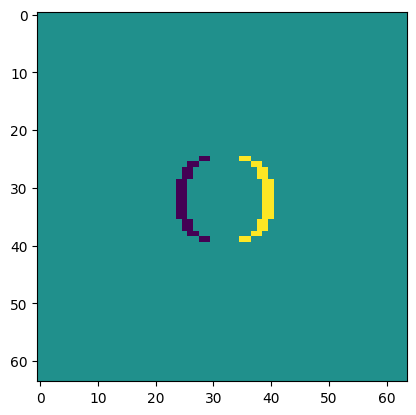

0
time 0.005100


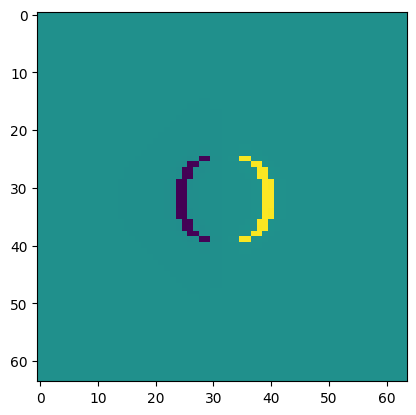

1
time 0.010100


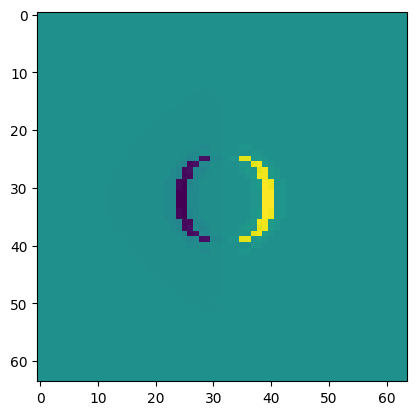

2
time 0.015100


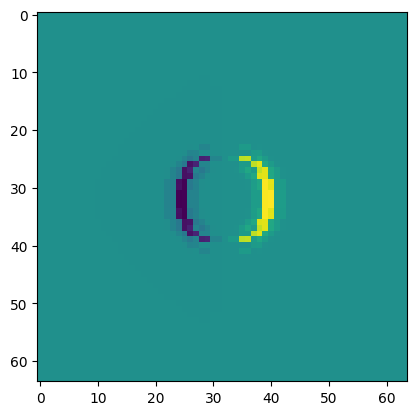

3
time 0.020100


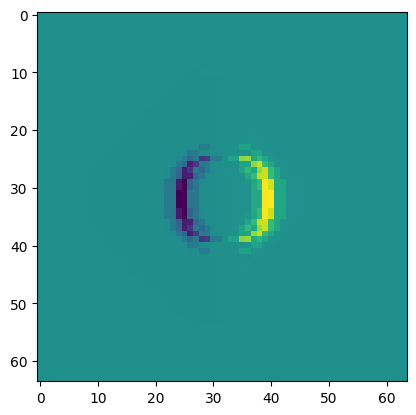

4
time 0.025100


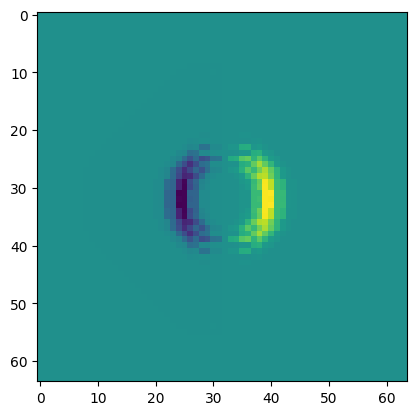

5
time 0.030100


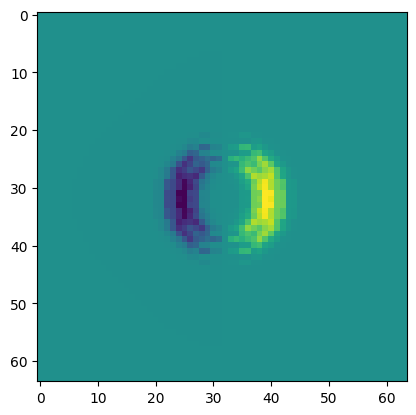

6
time 0.035100


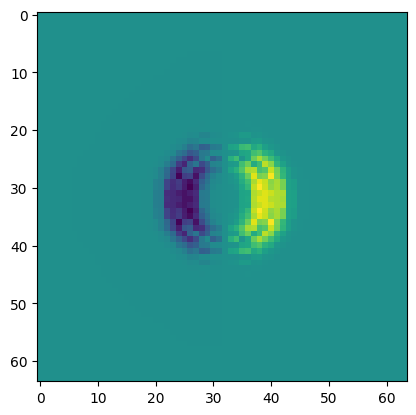

7
time 0.040100


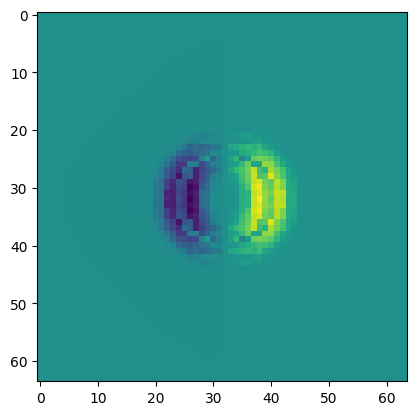

8
time 0.045100


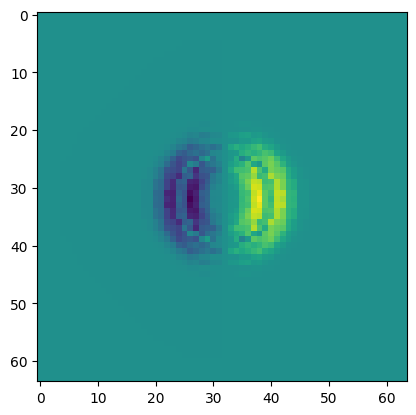

9
time 0.050100


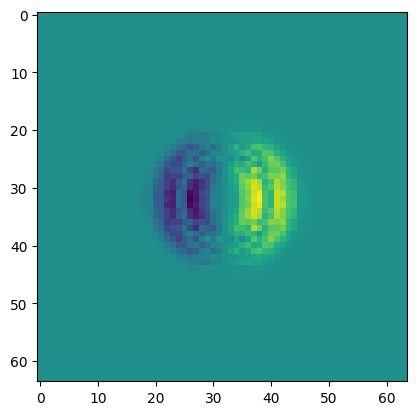

10
time 0.055100


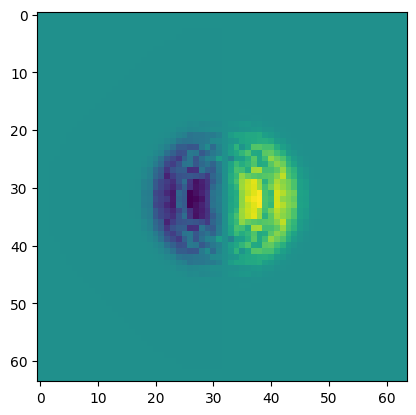

11
time 0.060100


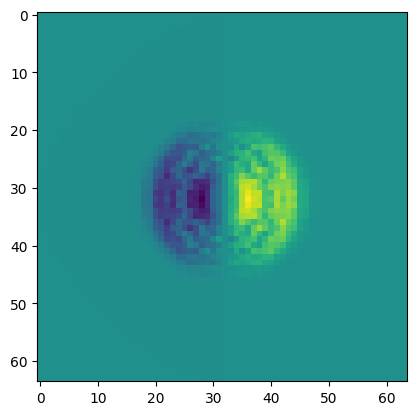

12
time 0.065100


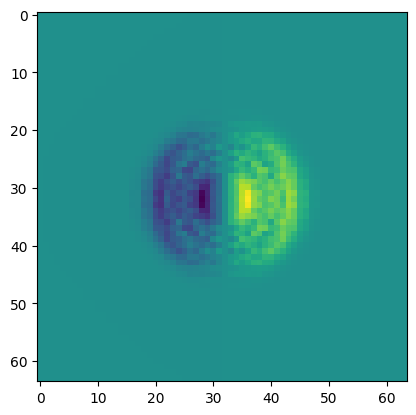

13
time 0.070100


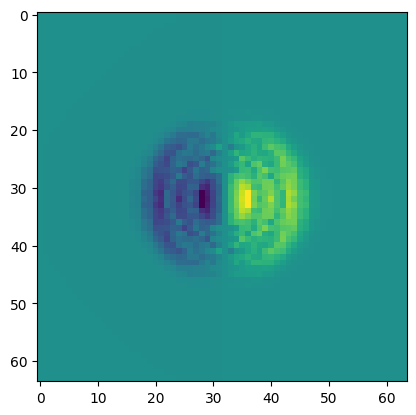

14
time 0.075100


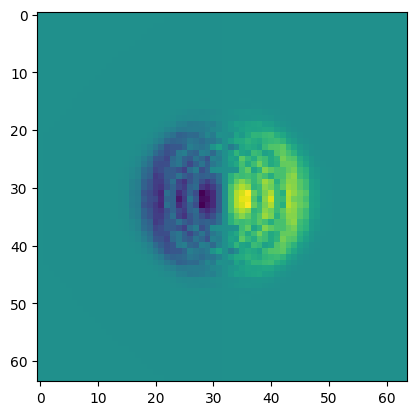

15
time 0.080100


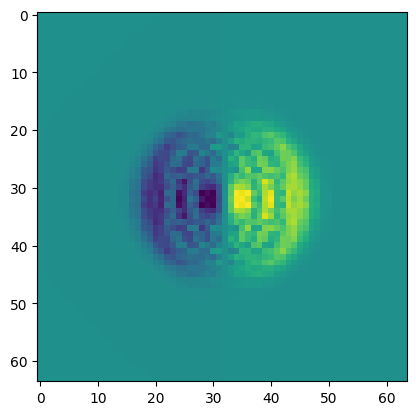

16
time 0.085100


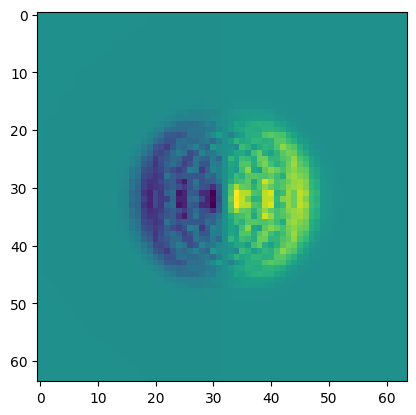

17
time 0.090100


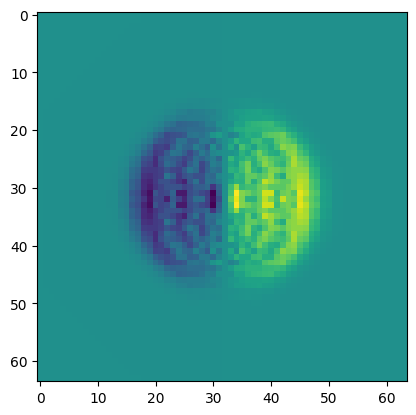

18
time 0.095100


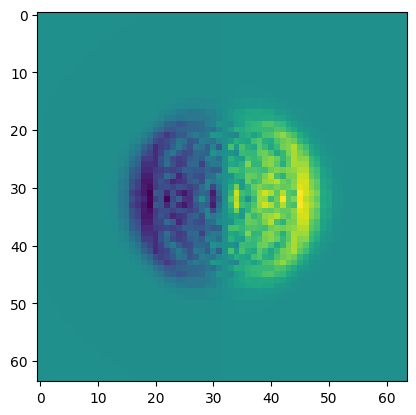

19
time 0.100100


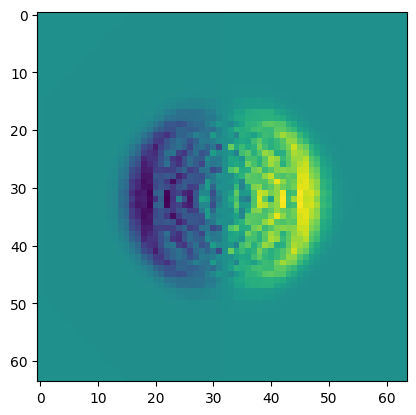

20
time 0.105100


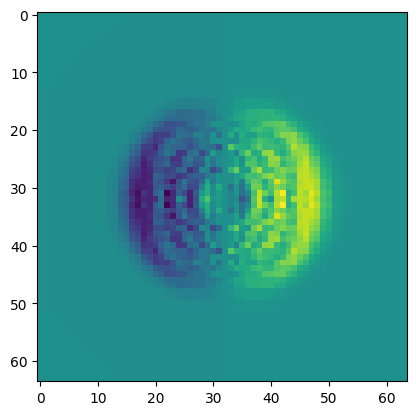

21
time 0.110100


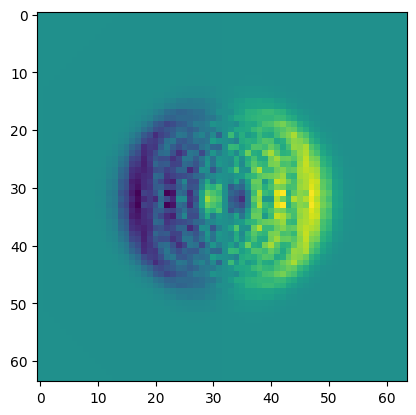

22
time 0.115100


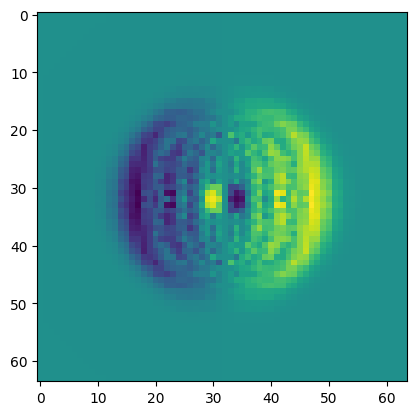

23
time 0.120100


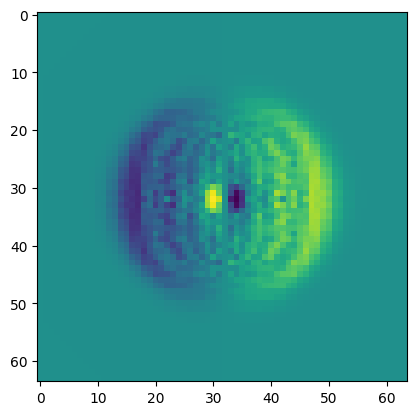

24
time 0.125100


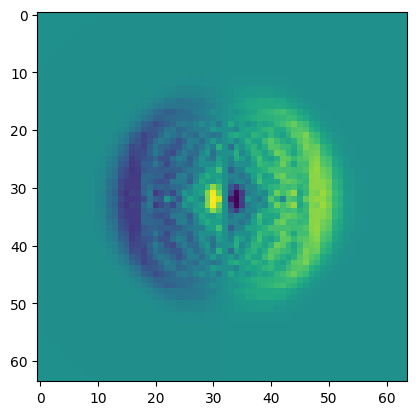

25
time 0.130100


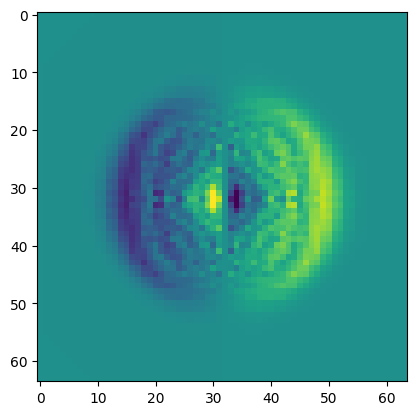

26
time 0.135100


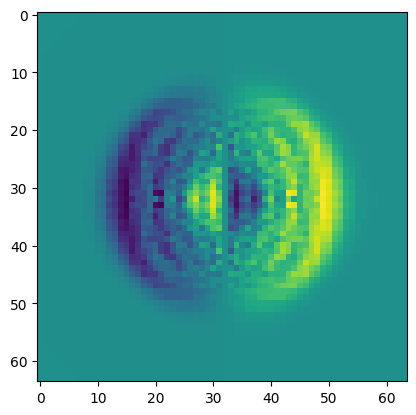

27
time 0.140100


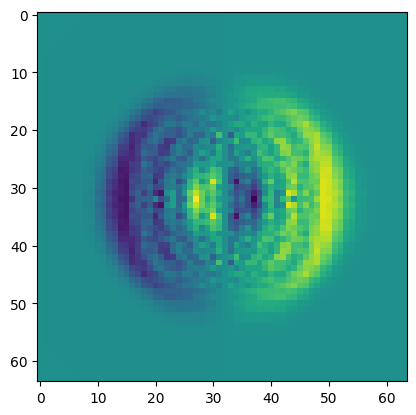

28
time 0.145100


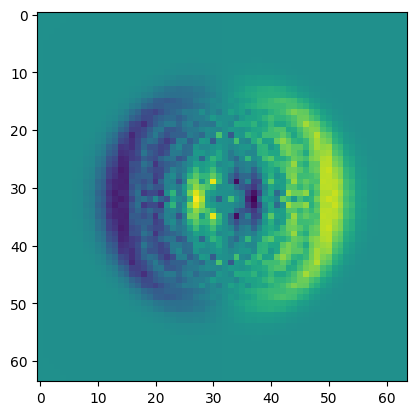

29
time 0.150100


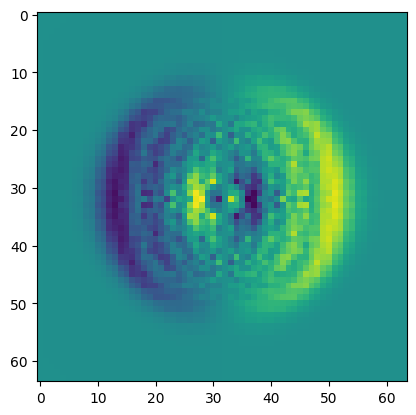

30
time 0.155100


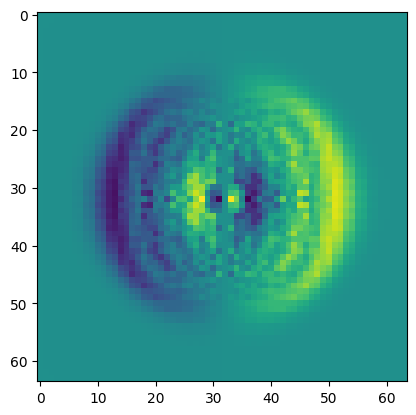

31
time 0.160100


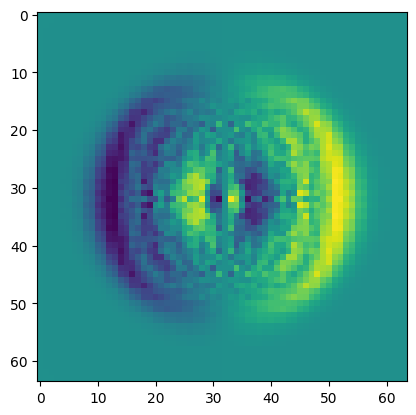

32
time 0.165100


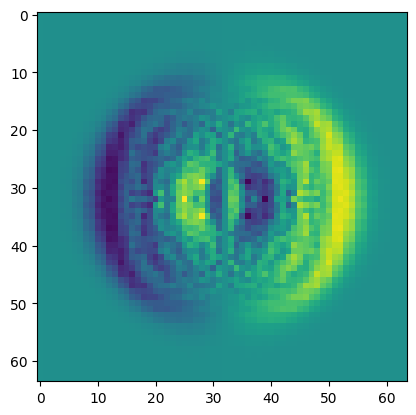

33
time 0.170100


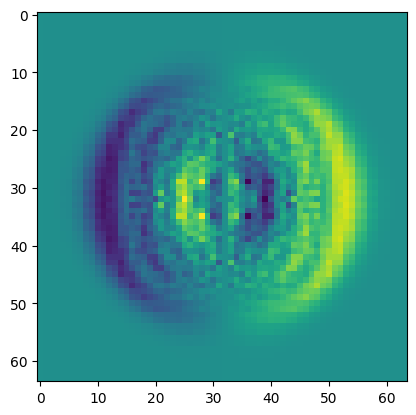

34
time 0.175100


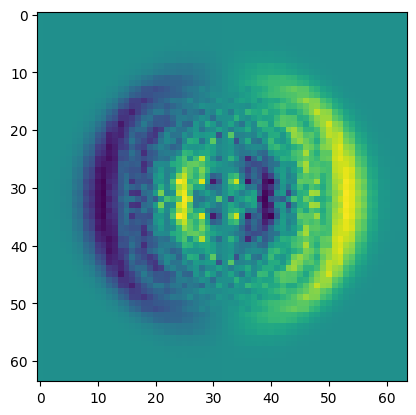

35
time 0.180100


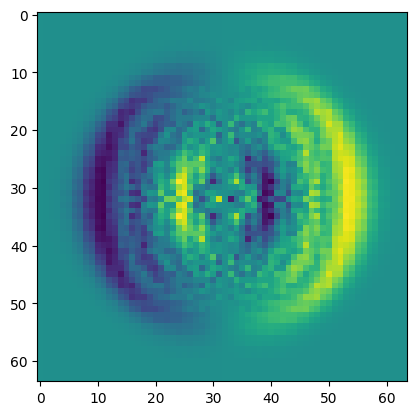

36
time 0.185100


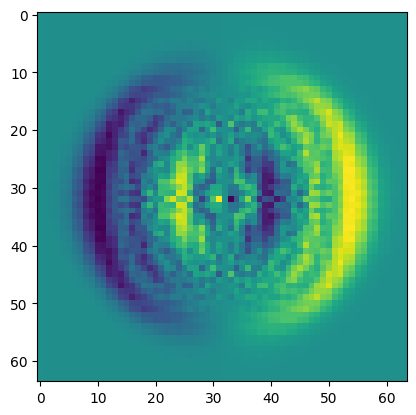

37
time 0.190100


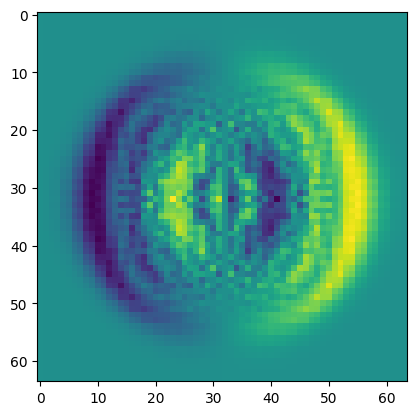

38
time 0.195100


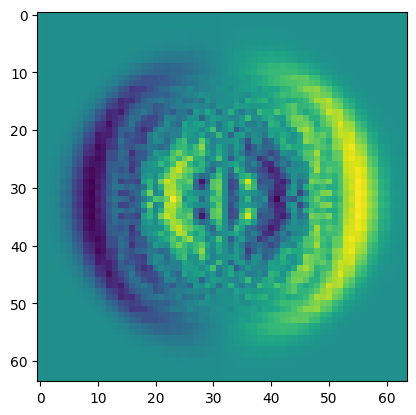

39
time 0.200100


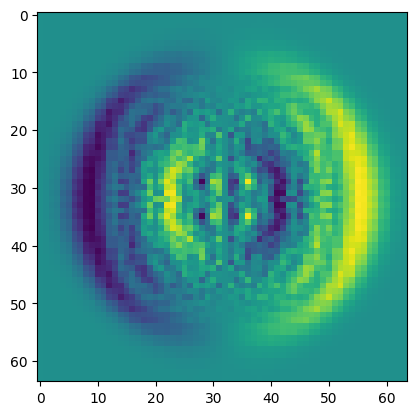

40
time 0.205100


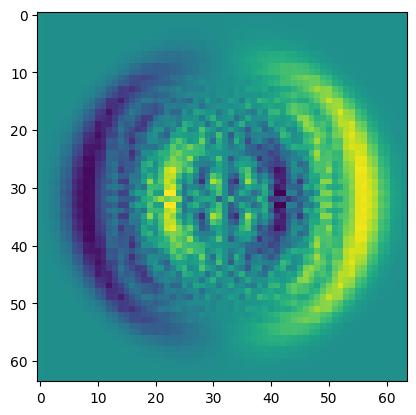

41
time 0.210100


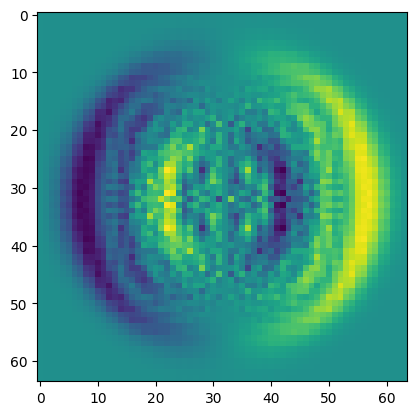

42
time 0.215100


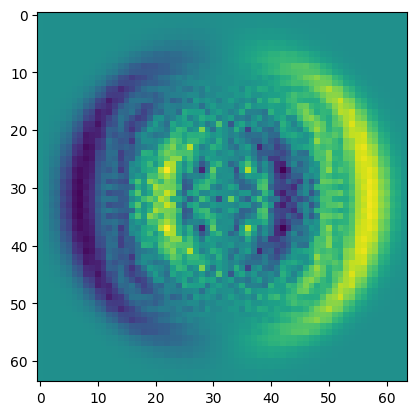

43
time 0.220100


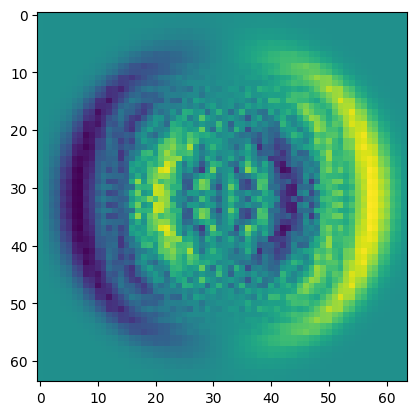

44
time 0.225100


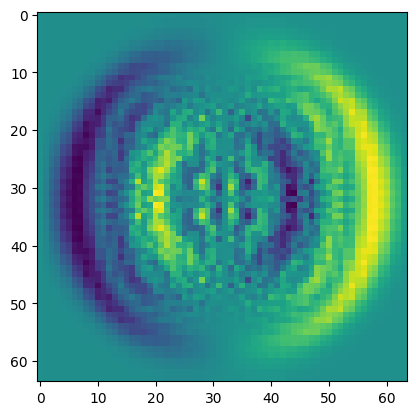

45
time 0.230100


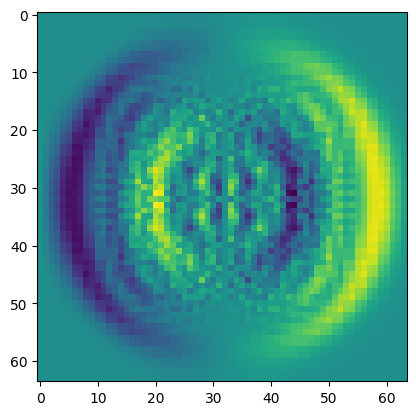

46
time 0.235100


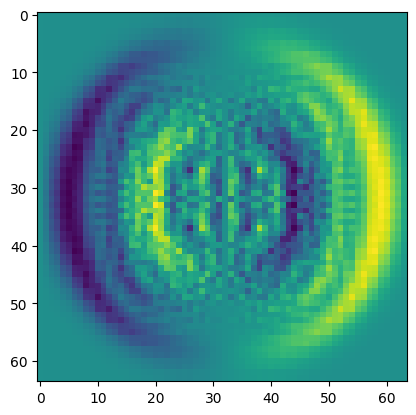

47
time 0.240100


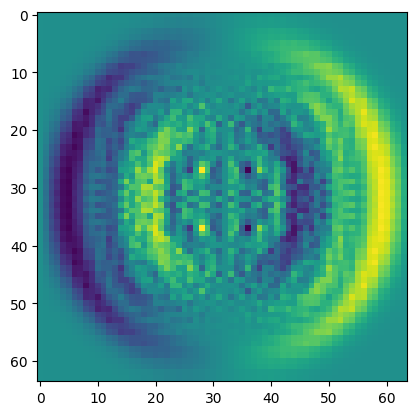

48
time 0.245100


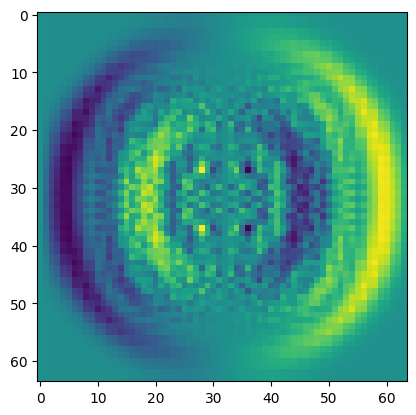

49
time 0.250100


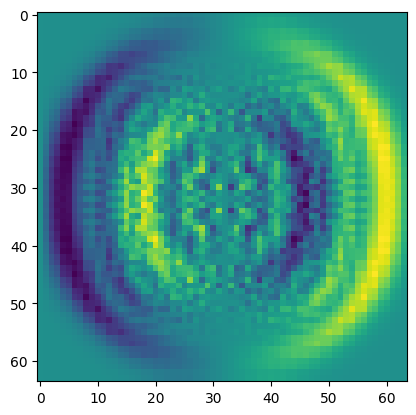

50
time 0.255100


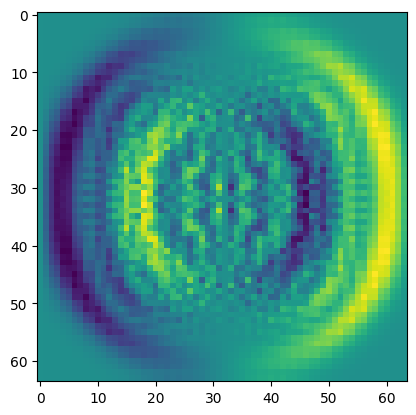

51
time 0.260100


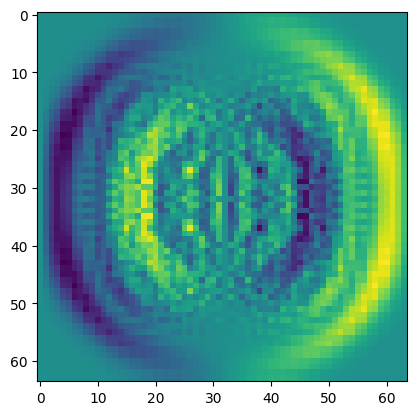

52
time 0.265100


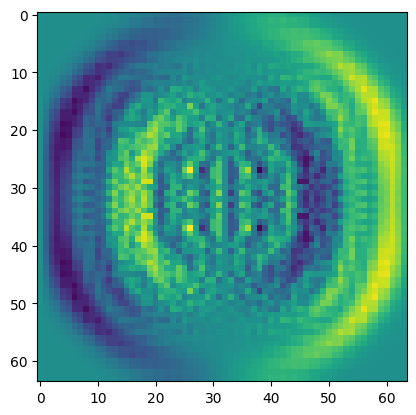

53
time 0.270100


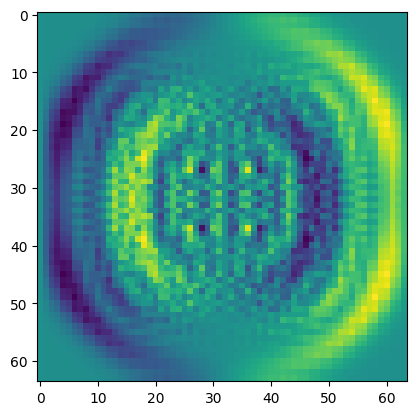

54
time 0.275100


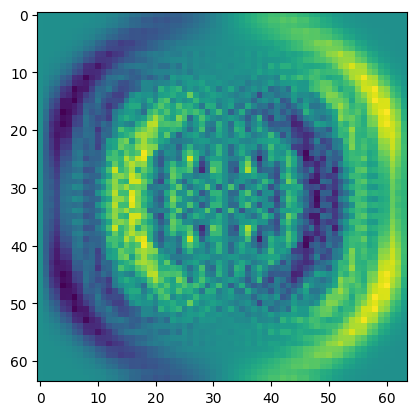

55
time 0.280100


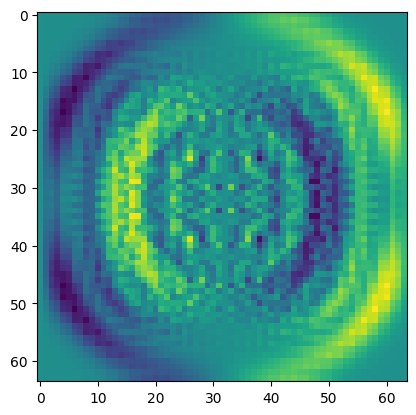

56
time 0.285100


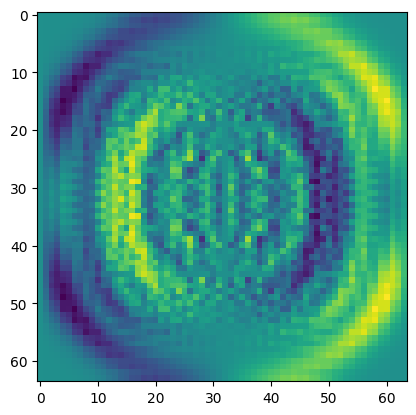

57
time 0.290100


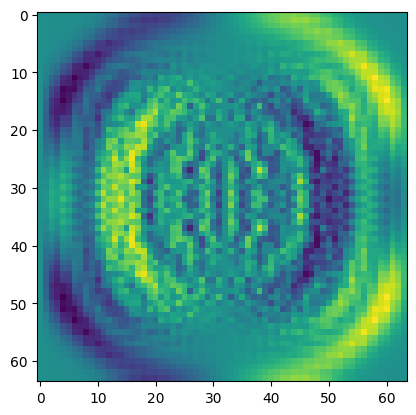

58
time 0.295100


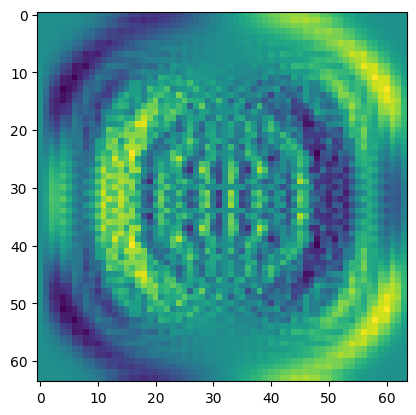

59
time 0.300100


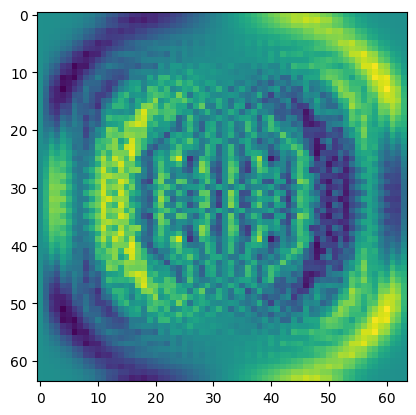

60
time 0.305100


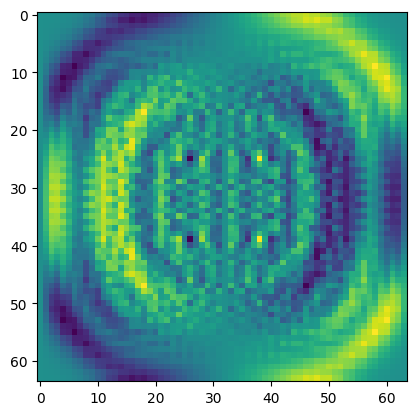

61
time 0.310100


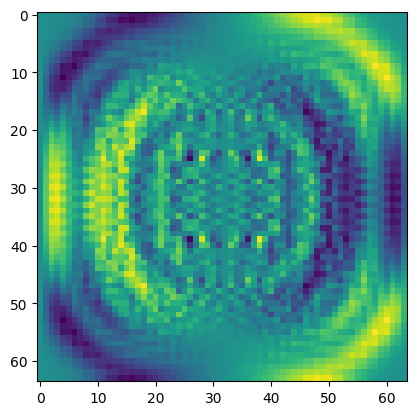

62
time 0.315100


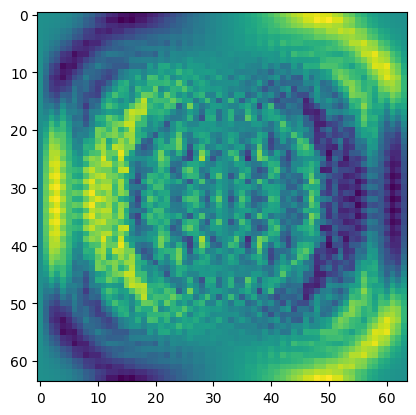

63
time 0.320100


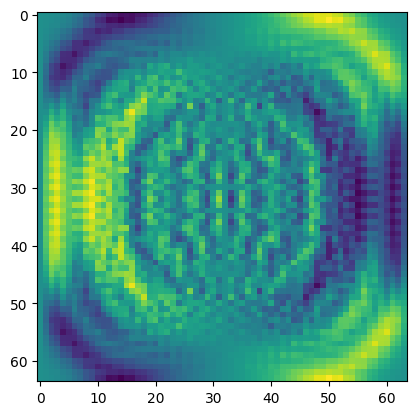

64
time 0.325100


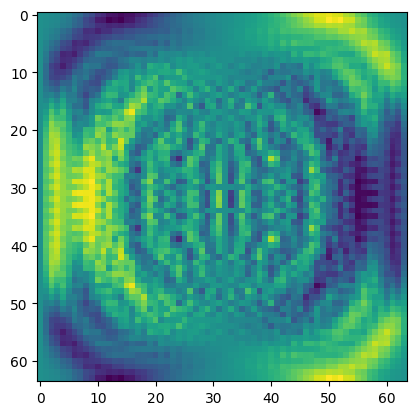

65
time 0.330100


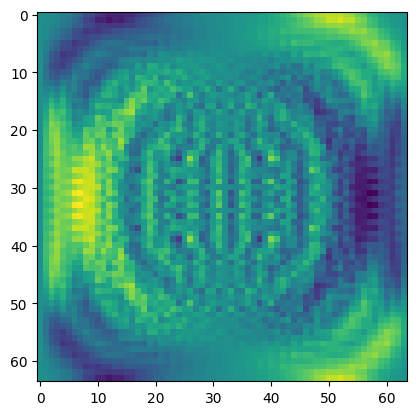

66
time 0.335100


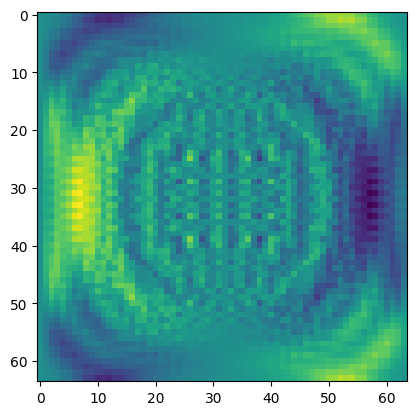

67
time 0.340100


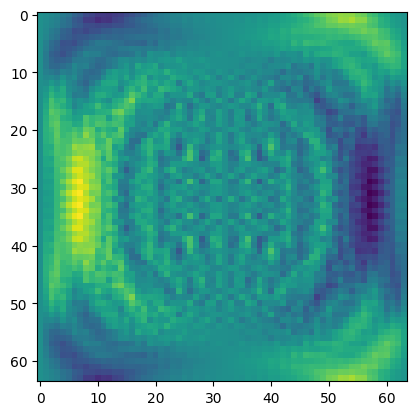

68
time 0.345100


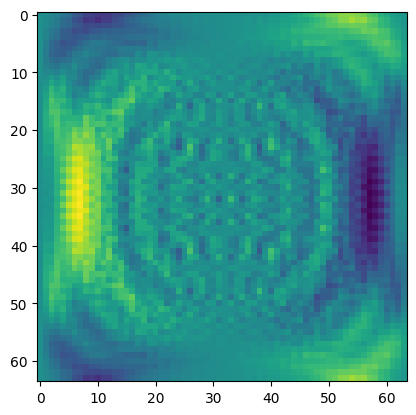

69
time 0.350100


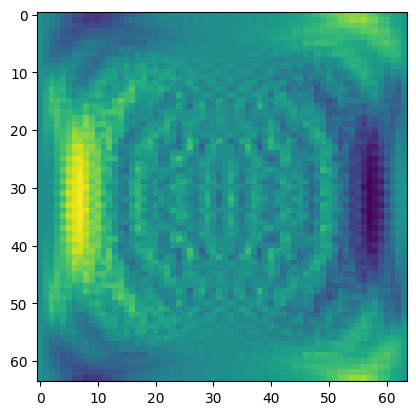

70
time 0.355100


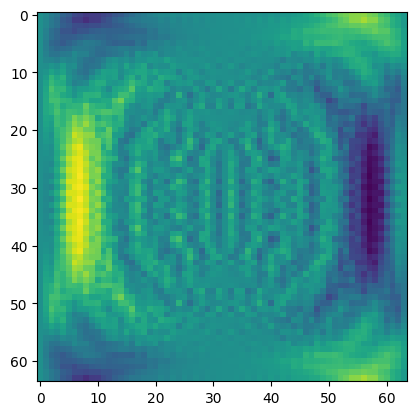

71
time 0.360100


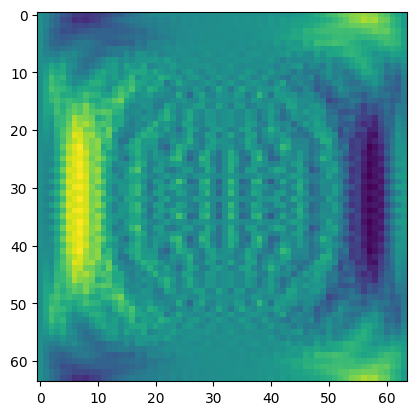

72
time 0.365100


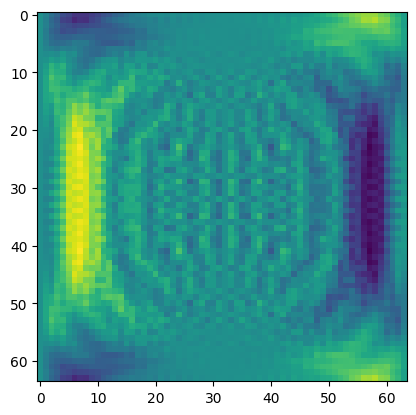

73
time 0.370100


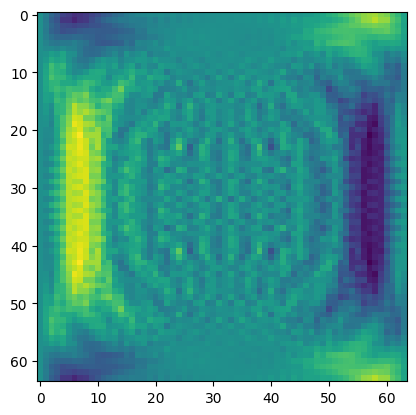

74
time 0.375100


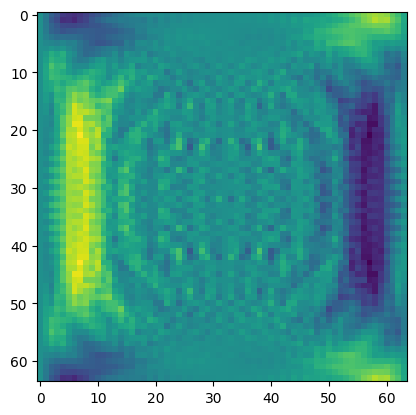

75
time 0.380100


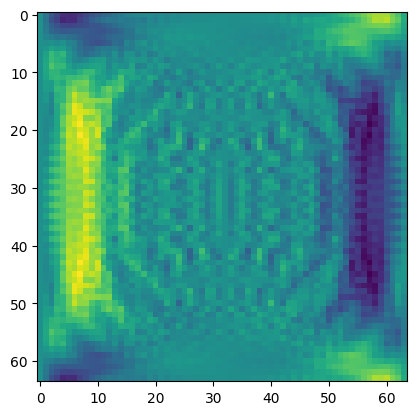

76
time 0.385100


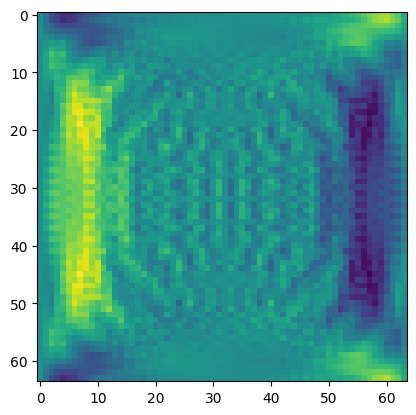

77
time 0.390100


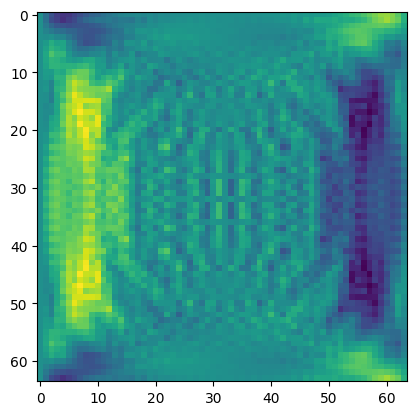

78
time 0.395100


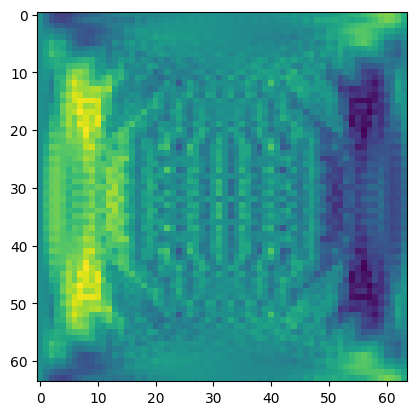

79
time 0.400100


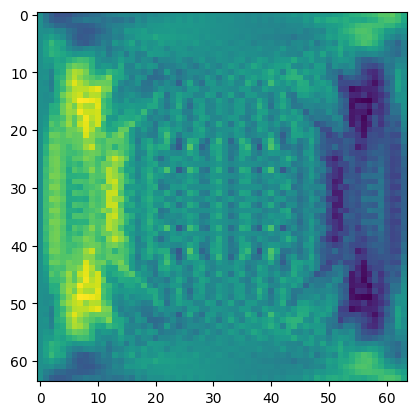

80
time 0.405100


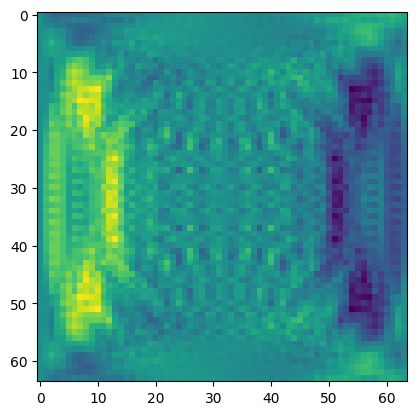

81
time 0.410100


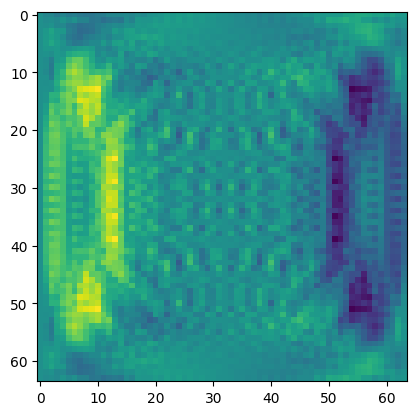

82
time 0.415100


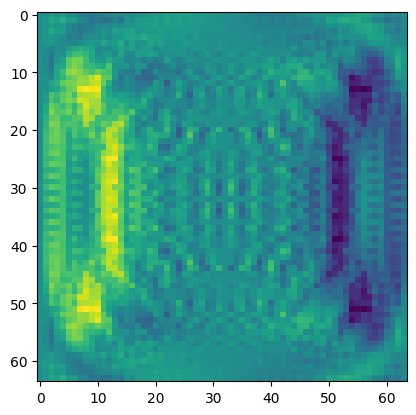

83
time 0.420100


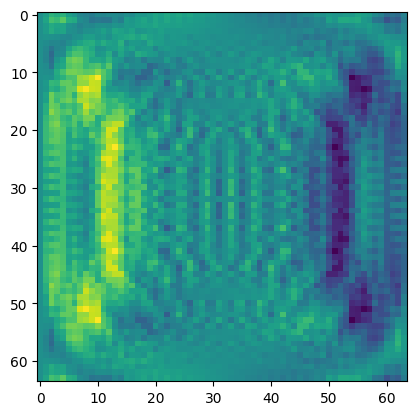

84
time 0.425100


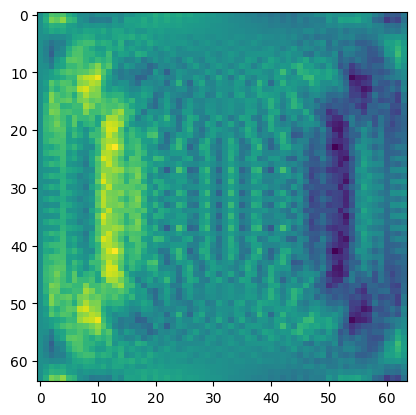

85
time 0.430100


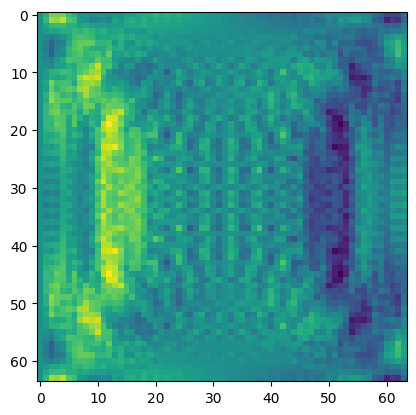

86
time 0.435100


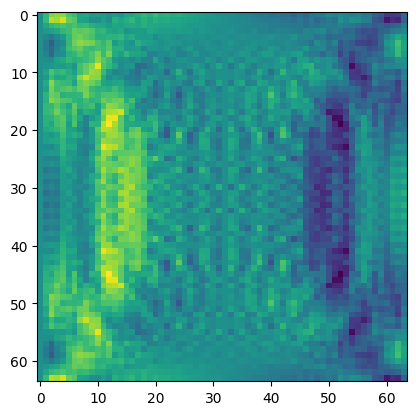

87
time 0.440100


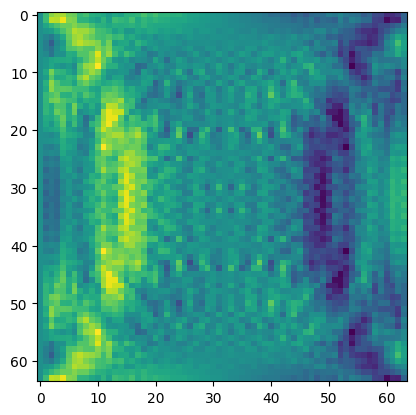

88
time 0.445100


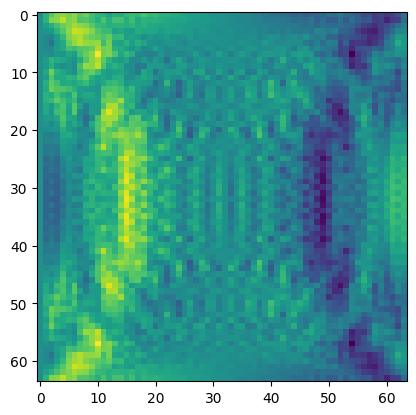

89
time 0.450100


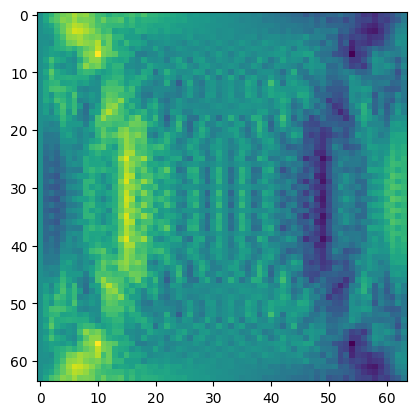

90
time 0.455100


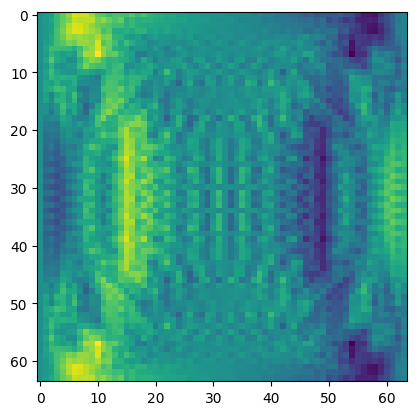

91
time 0.460100


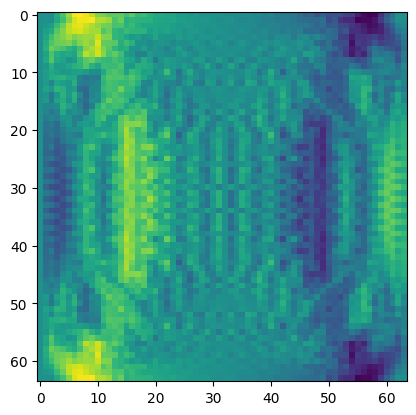

92
time 0.465100


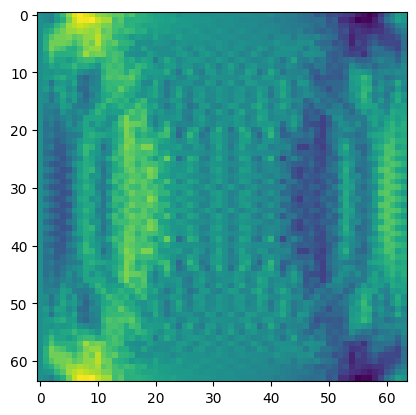

93
time 0.470100


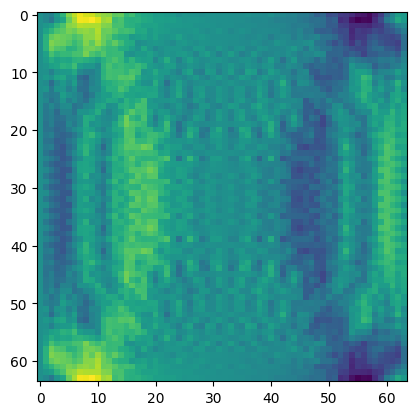

94
time 0.475100


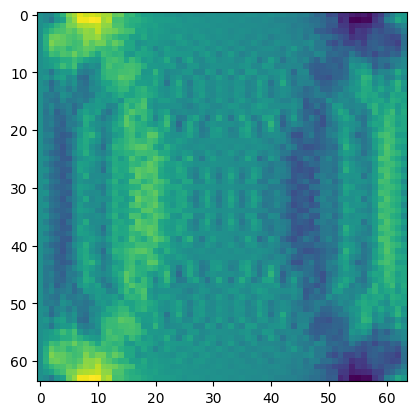

95
time 0.480100


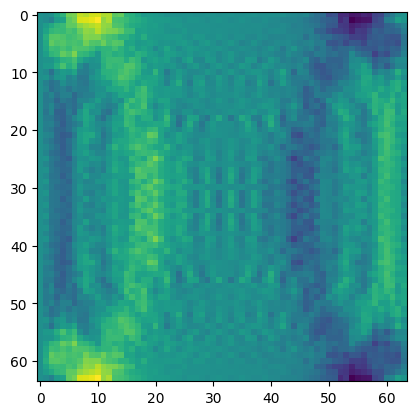

96
time 0.485100


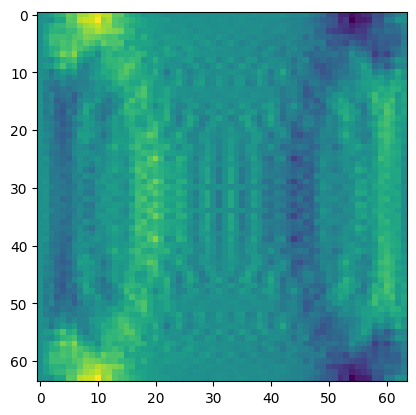

97
time 0.490100


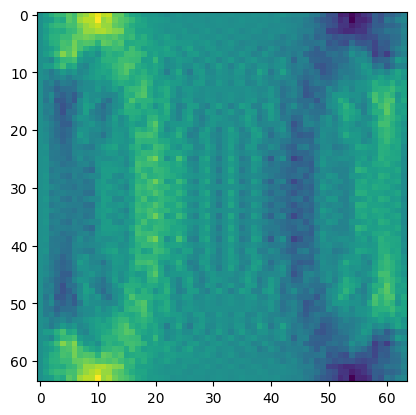

98
time 0.495100


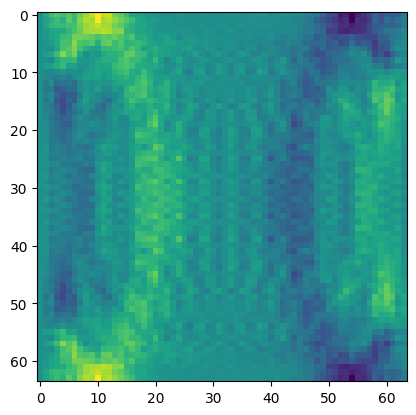

99
time 0.500100


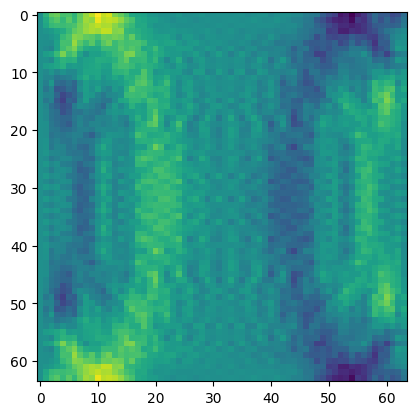

100
time 0.505100


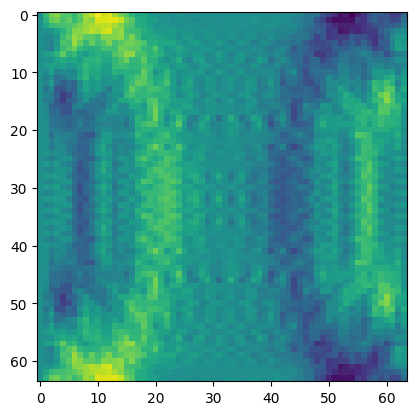

101
time 0.510100


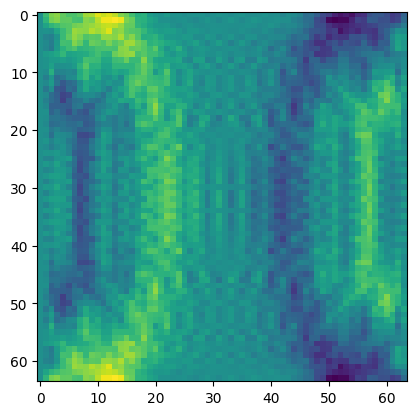

102
time 0.515100


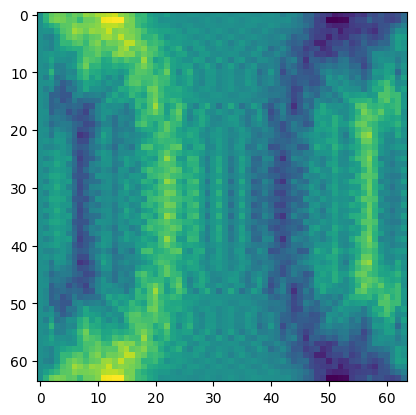

103
time 0.520100


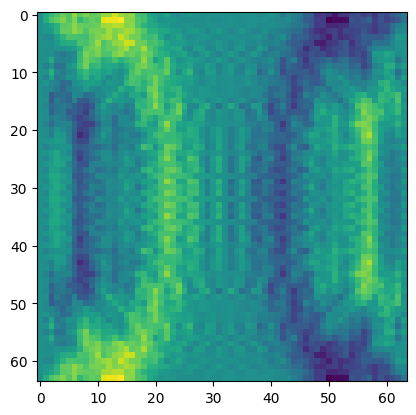

104
time 0.525100


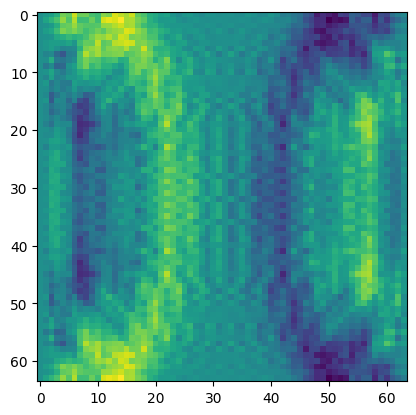

105
time 0.530100


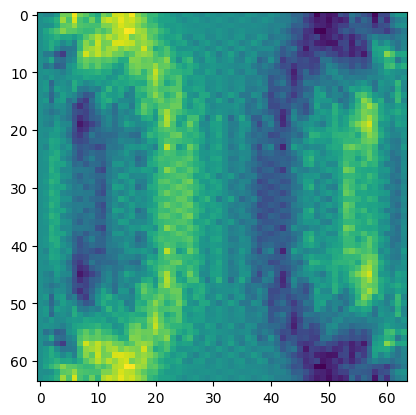

106
time 0.535100


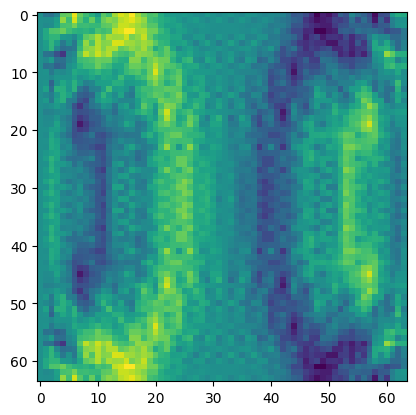

107
time 0.540100


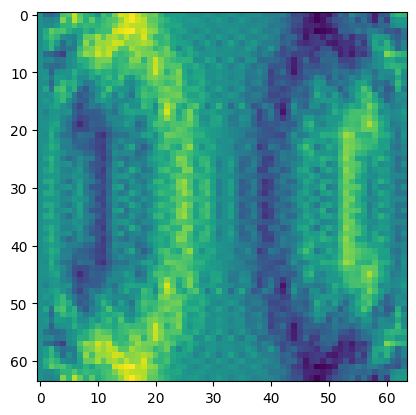

108
time 0.545100


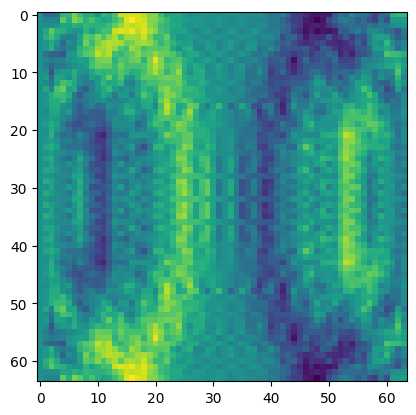

109
time 0.550100


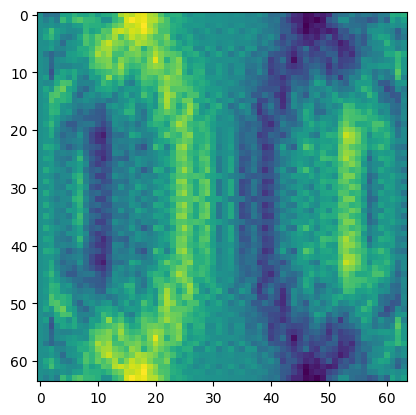

110
time 0.555100


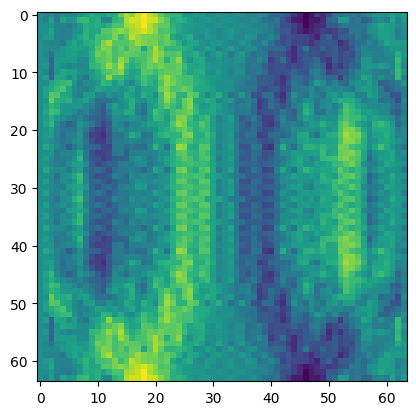

111
time 0.560100


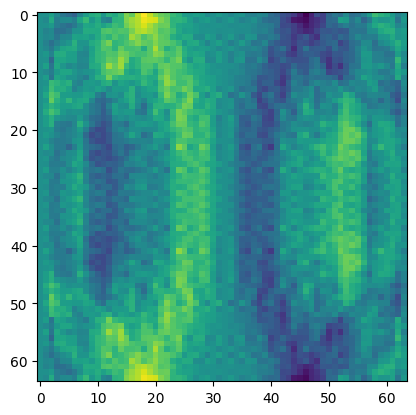

112
time 0.565100


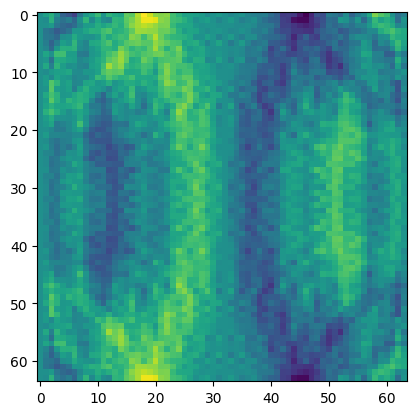

113
time 0.570100


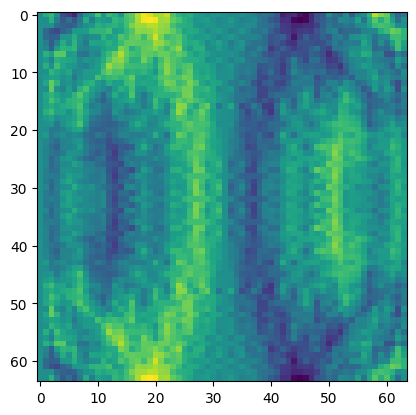

114
time 0.575100


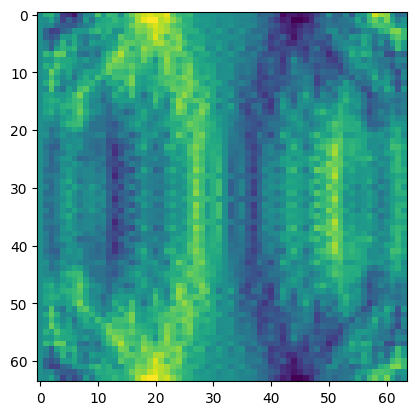

115
time 0.580100


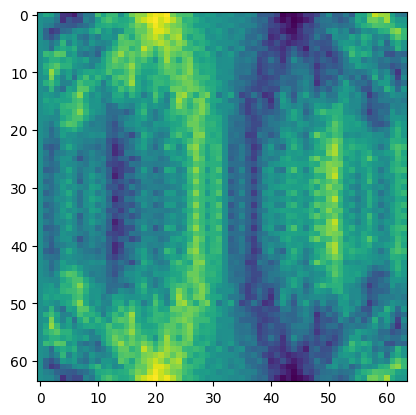

116
time 0.585100


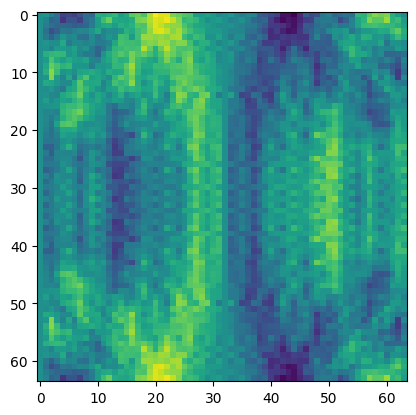

117
time 0.590100


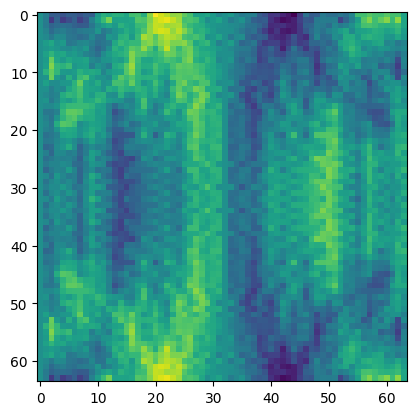

118
time 0.595100


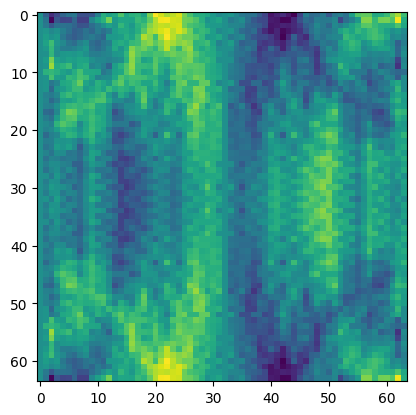

119
time 0.600100


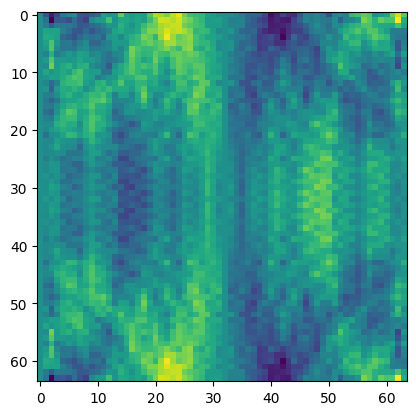

120
time 0.605100


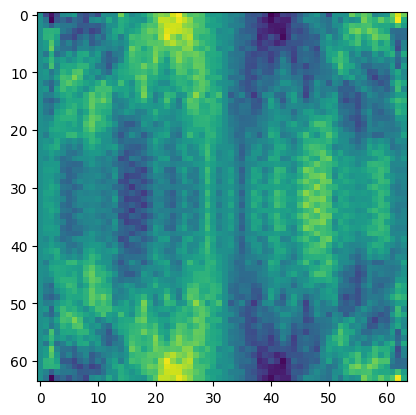

121
time 0.610100


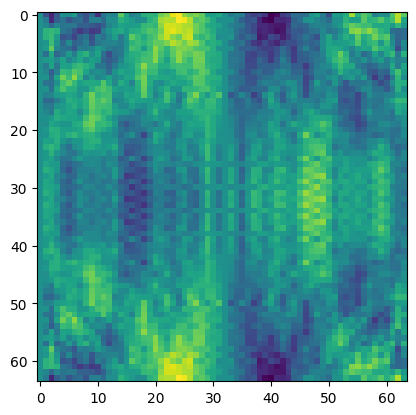

122
time 0.615100


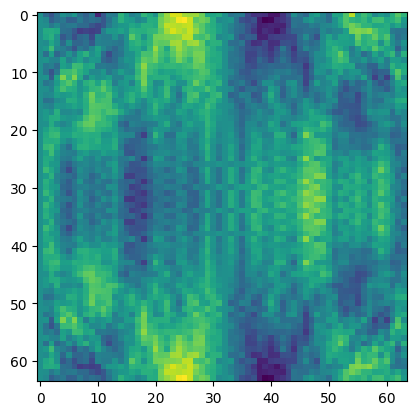

123
time 0.620100


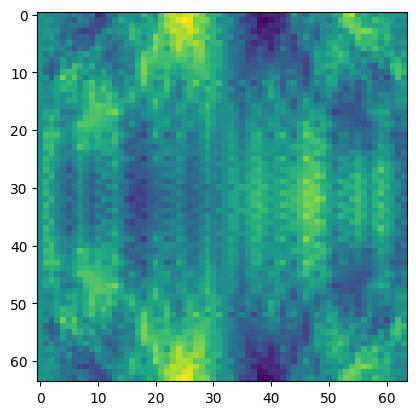

124
time 0.625100


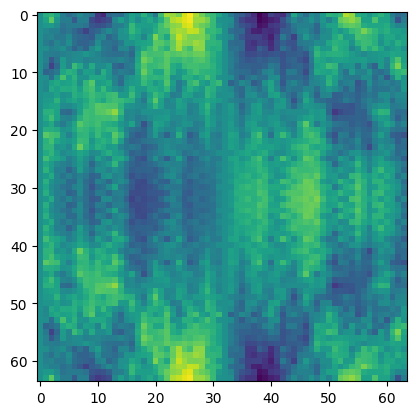

125
time 0.630100


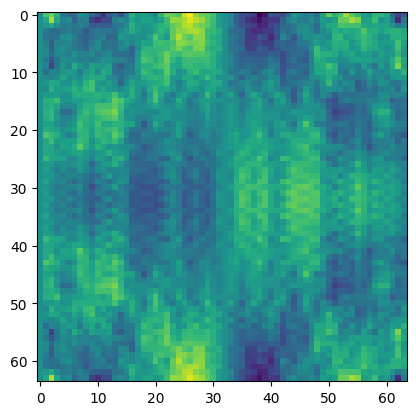

126
time 0.635100


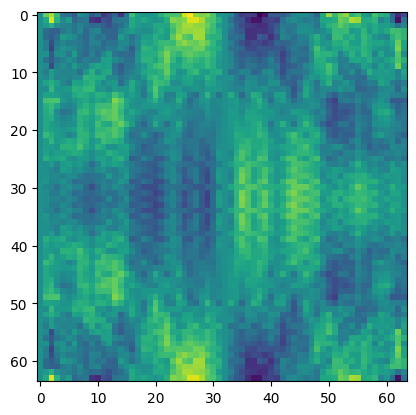

127
time 0.640100


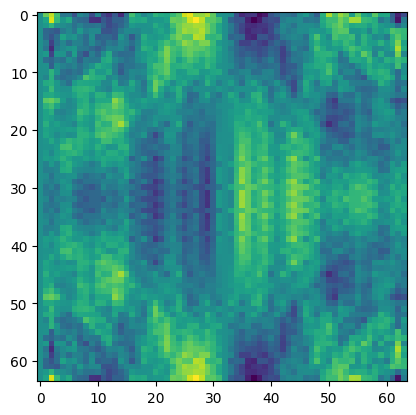

128
time 0.645100


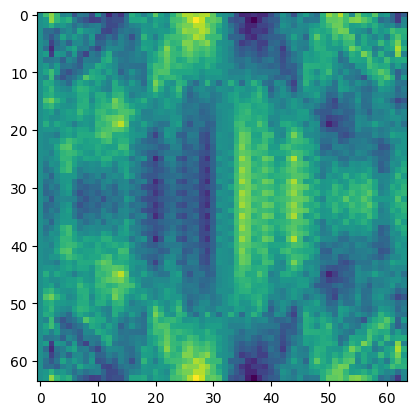

129
time 0.650100


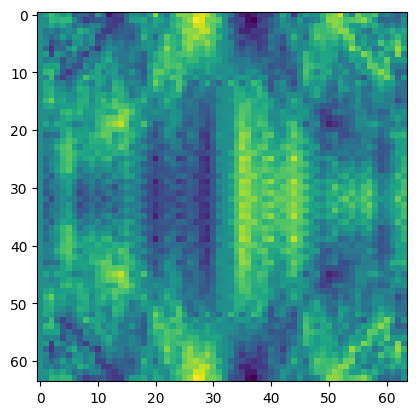

130
time 0.655100


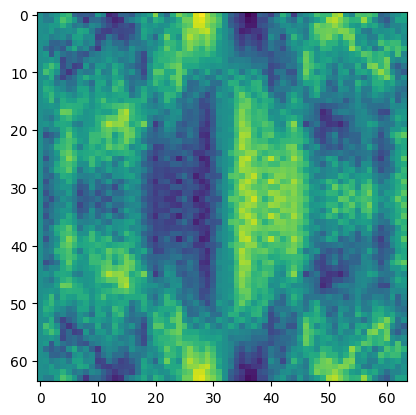

131
time 0.660100


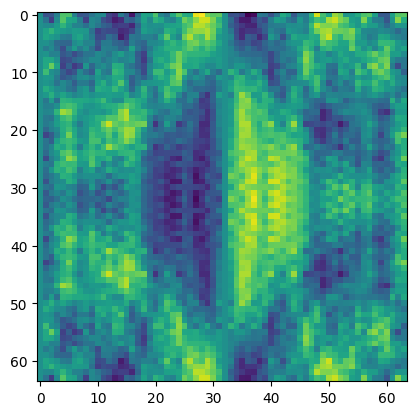

132
time 0.665100


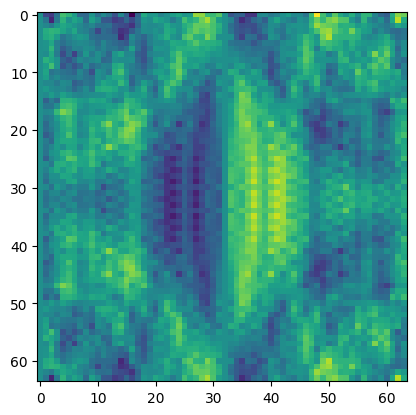

133
time 0.670100


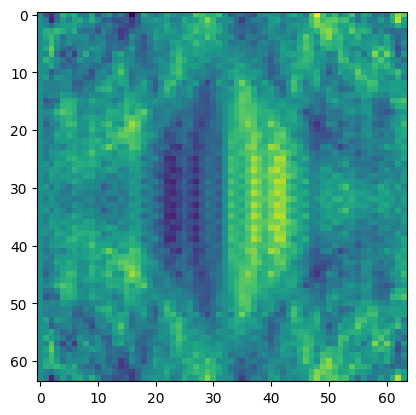

134
time 0.675100


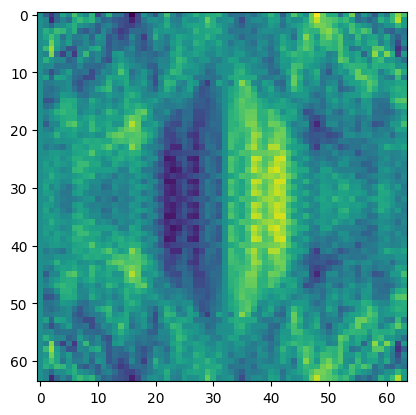

135
time 0.680100


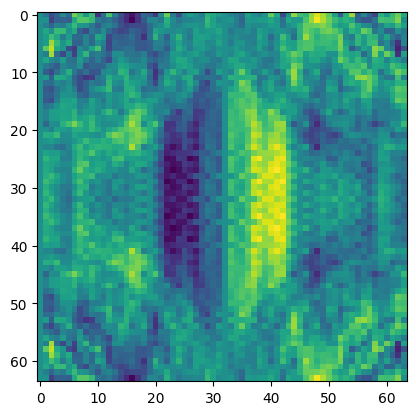

136
time 0.685100


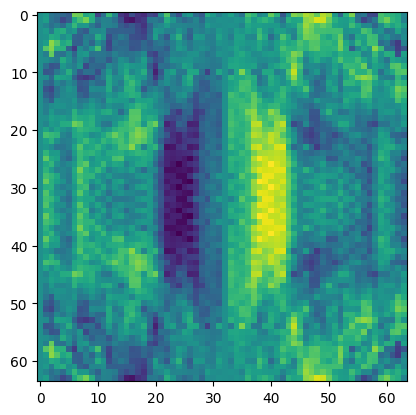

137
time 0.690100


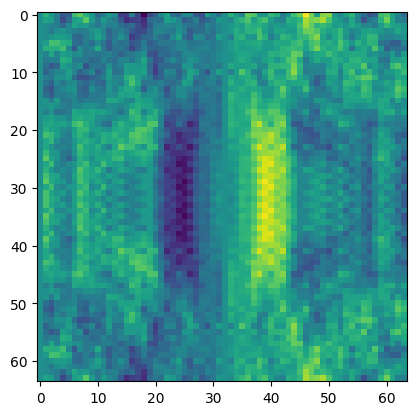

138
time 0.695100


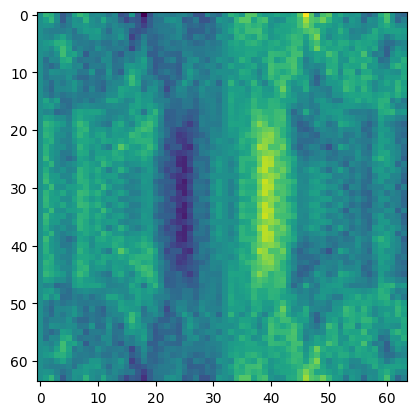

139
time 0.700100


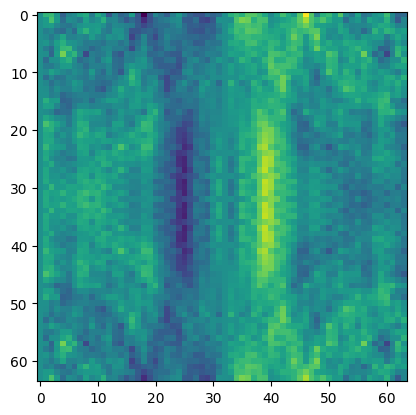

140
time 0.705100


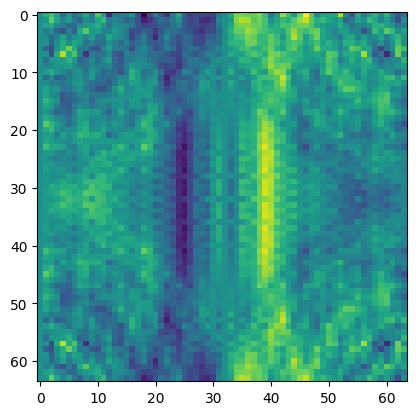

141
time 0.710100


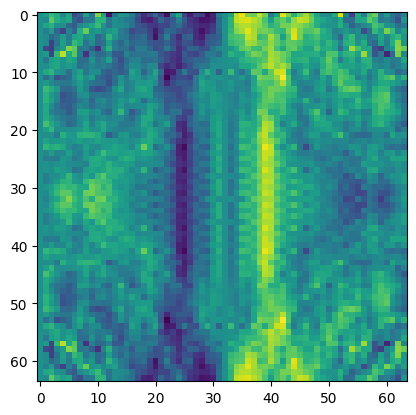

142
time 0.715100


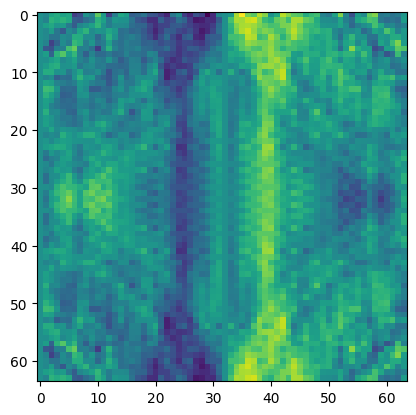

143
time 0.720100


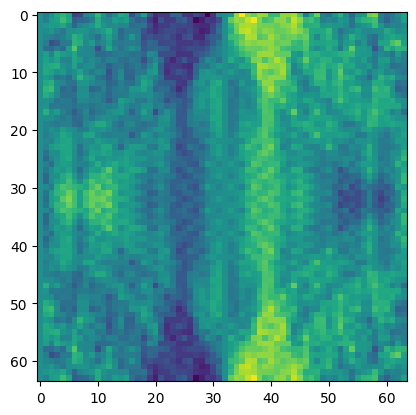

144
time 0.725100


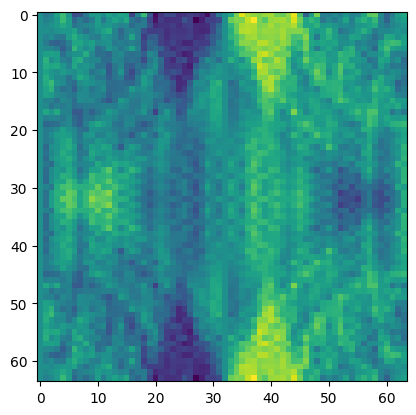

145
time 0.730100


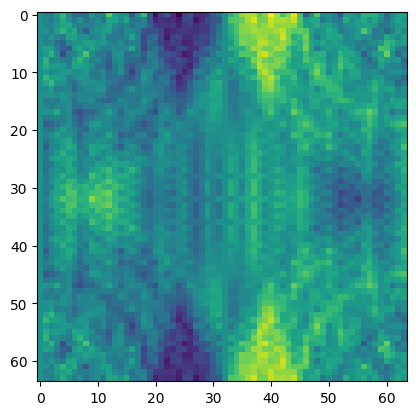

146
time 0.735100


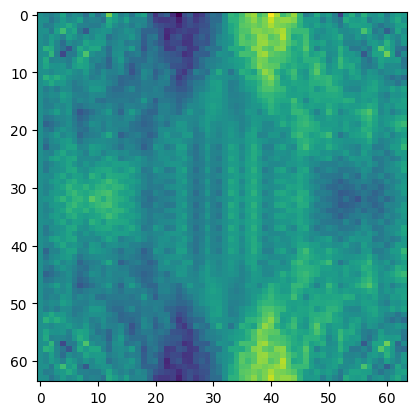

147
time 0.740100


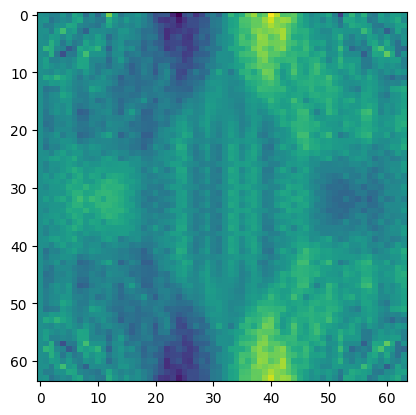

148
time 0.745100


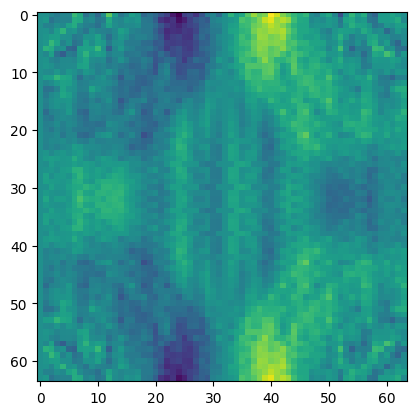

149
time 0.750100


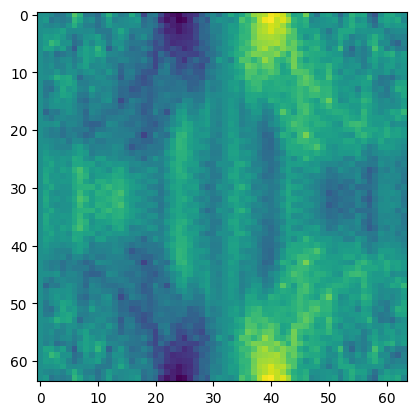

150
time 0.755100


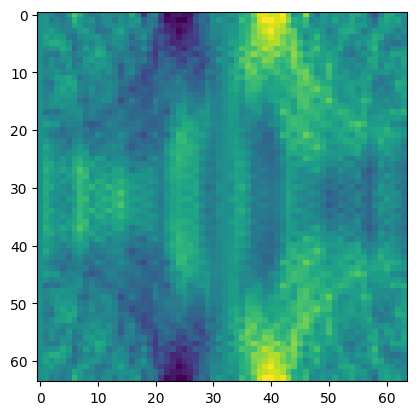

151
time 0.760100


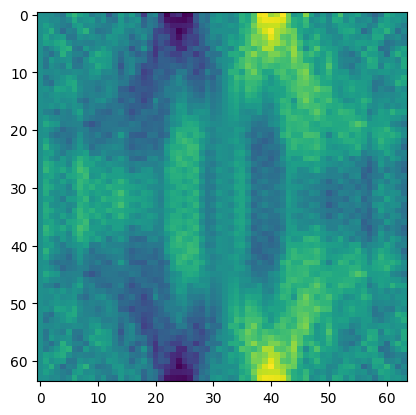

152
time 0.765100


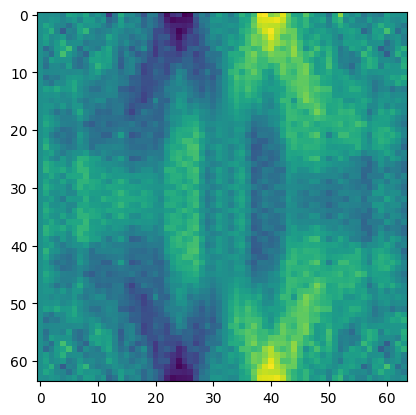

153
time 0.770100


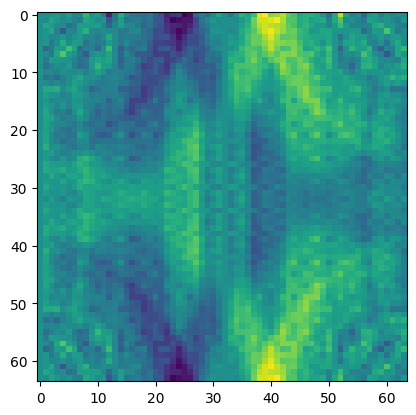

154
time 0.775100


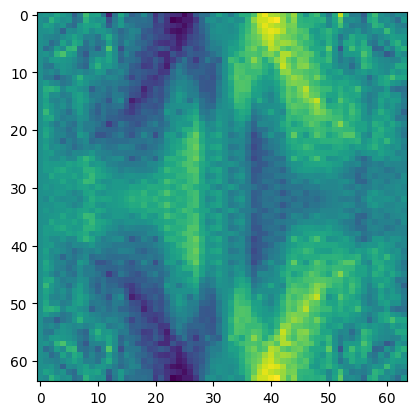

155
time 0.780100


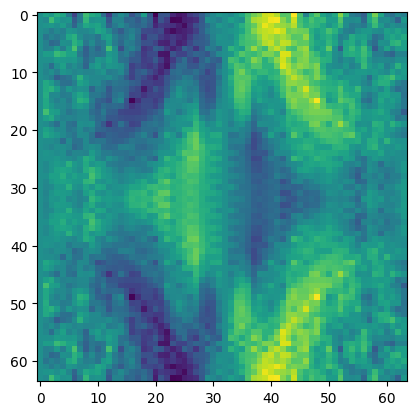

156
time 0.785100


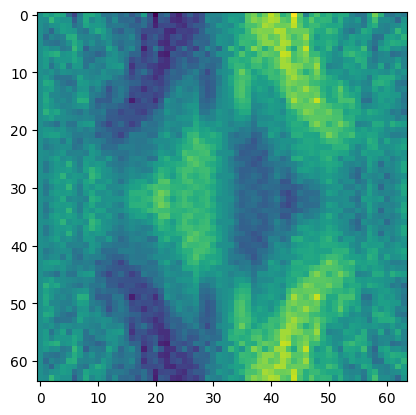

157
time 0.790100


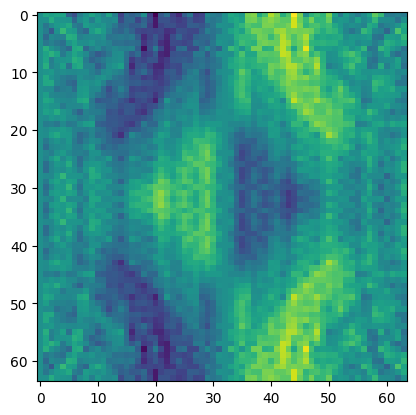

158
time 0.795100


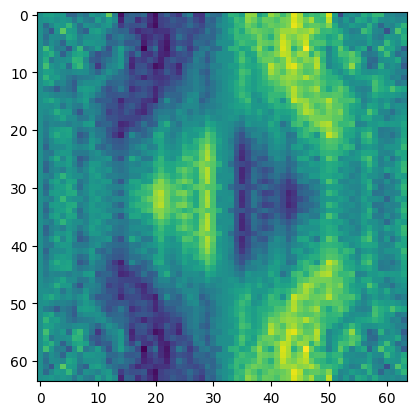

159
time 0.800100


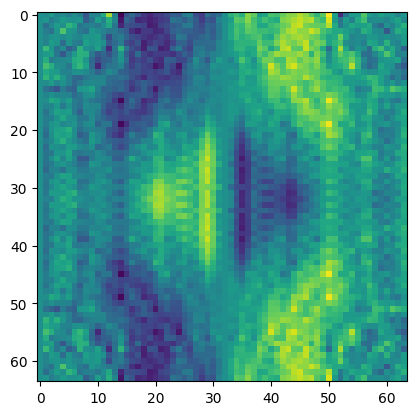

160
time 0.805100


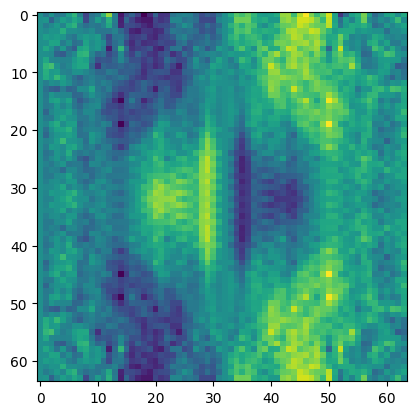

161
time 0.810100


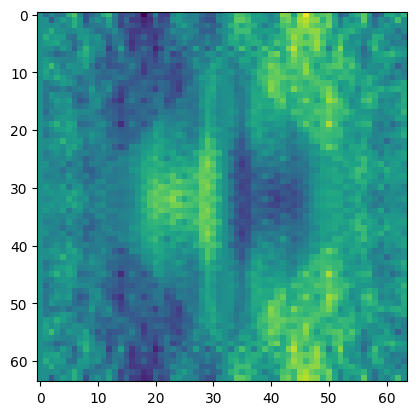

162
time 0.815100


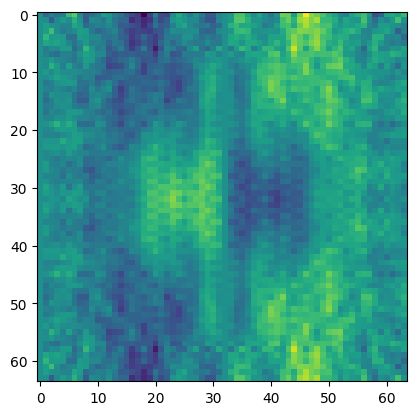

163
time 0.820100


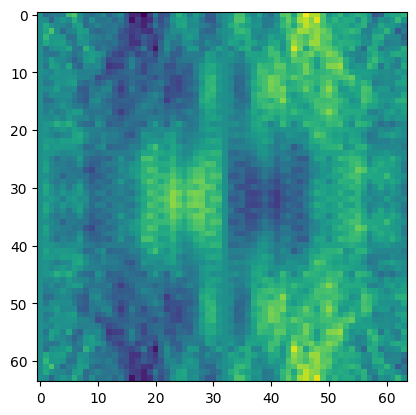

164
time 0.825100


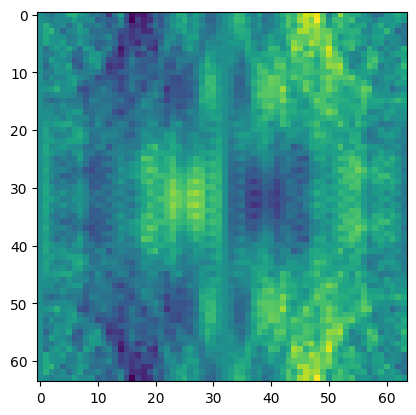

165
time 0.830100


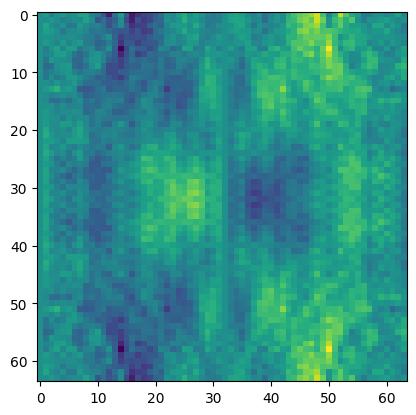

166
time 0.835100


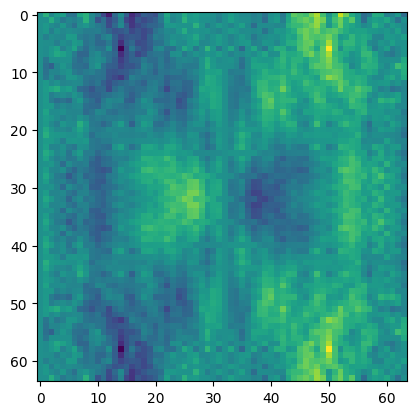

167
time 0.840100


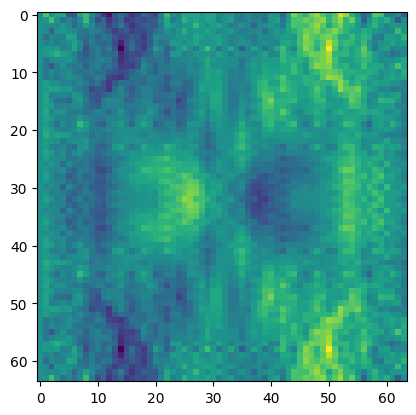

168
time 0.845100


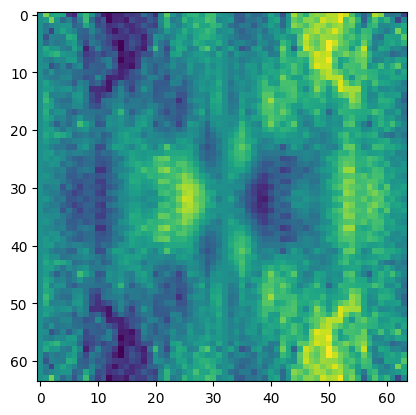

169
time 0.850100


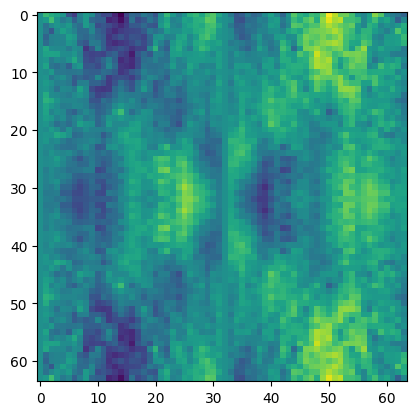

170
time 0.855100


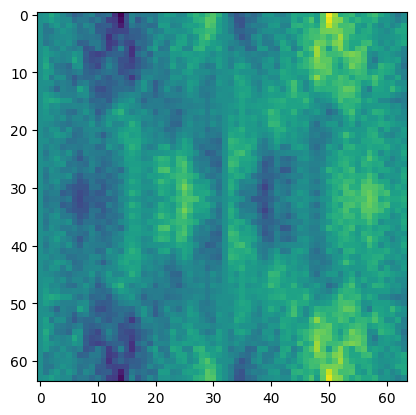

171
time 0.860100


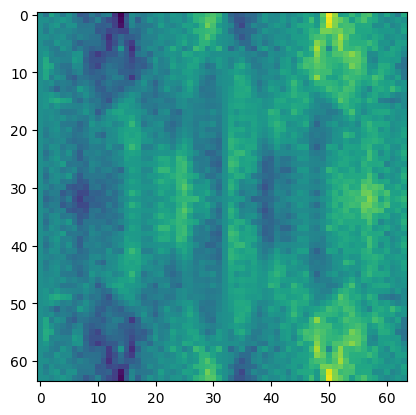

172
time 0.865100


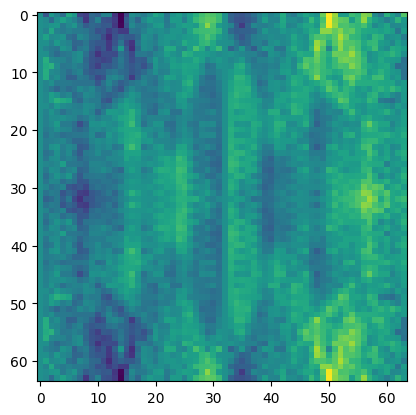

173
time 0.870100


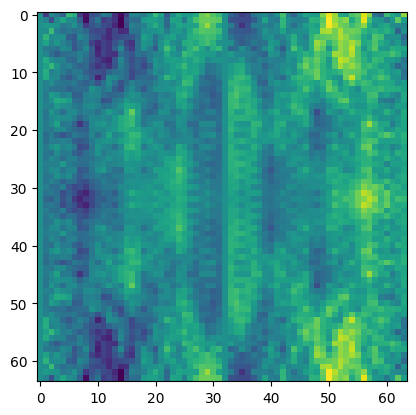

174
time 0.875100


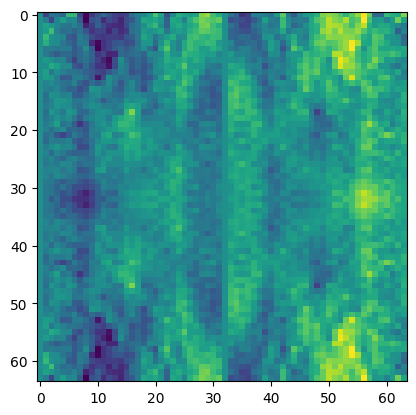

175
time 0.880100


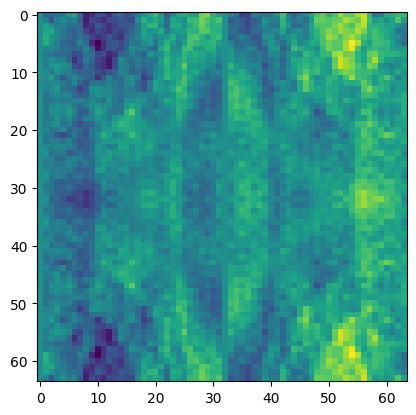

176
time 0.885100


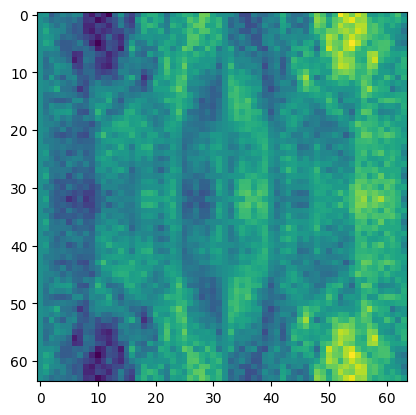

177
time 0.890100


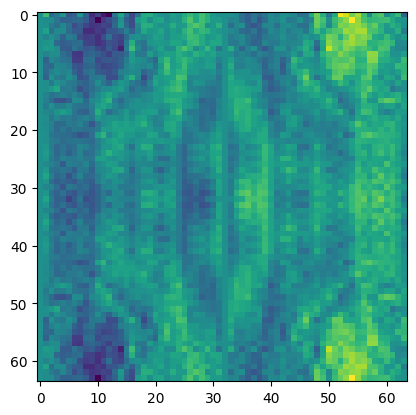

178
time 0.895100


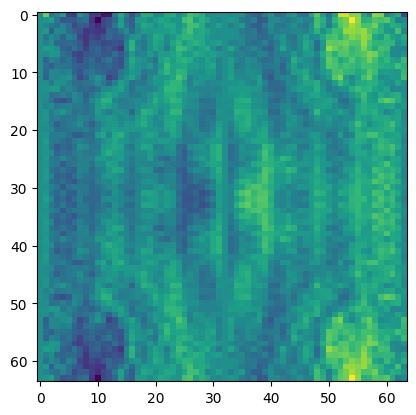

179
time 0.900100


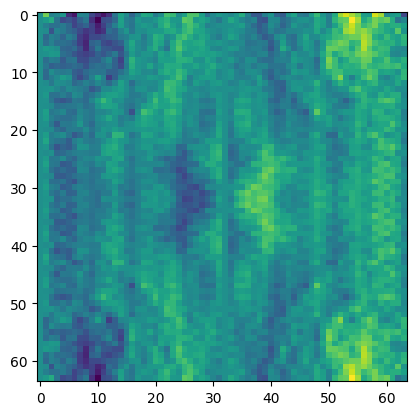

180
time 0.905100


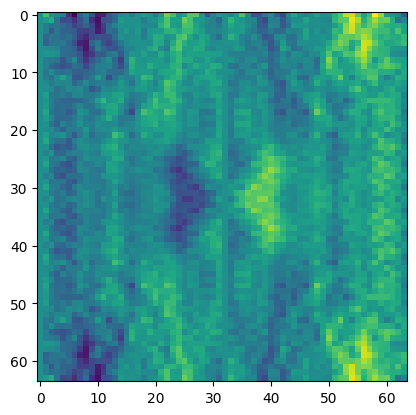

181
time 0.910100


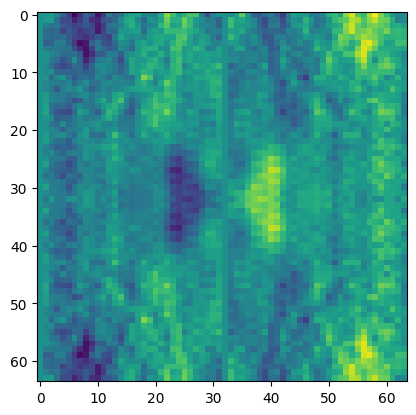

182
time 0.915100


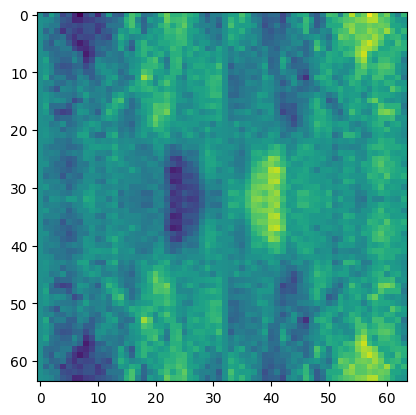

183
time 0.920100


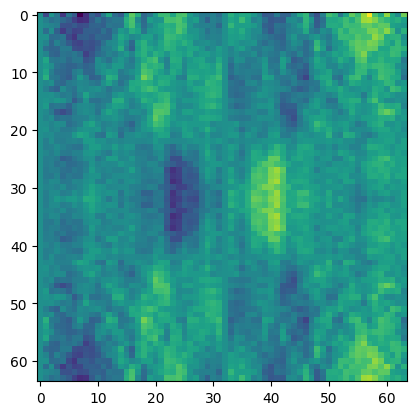

184
time 0.925100


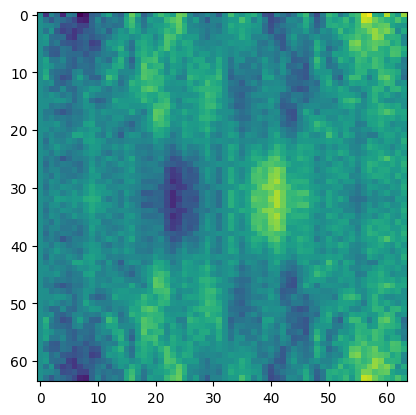

185
time 0.930100


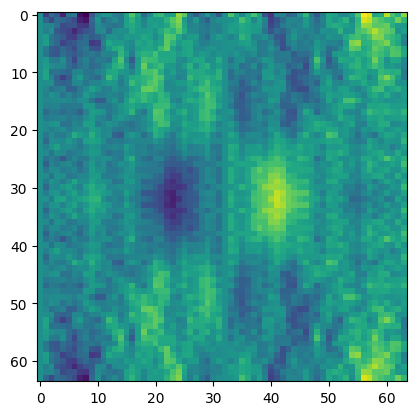

186
time 0.935100


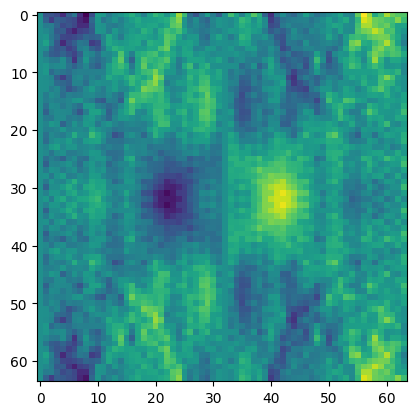

187
time 0.940100


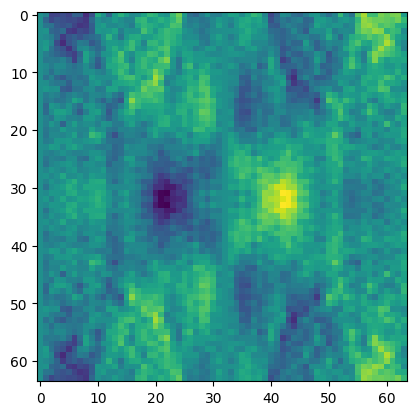

188
time 0.945100


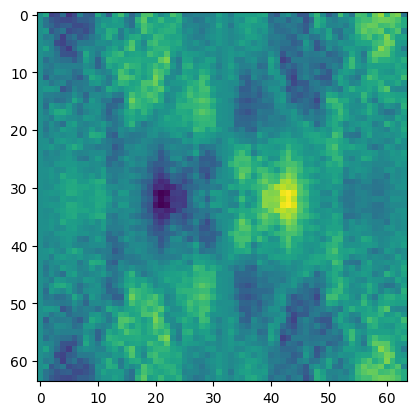

189
time 0.950100


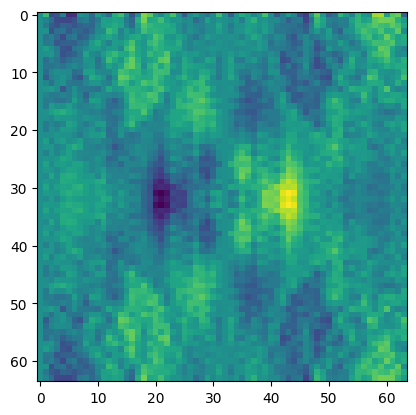

190
time 0.955100


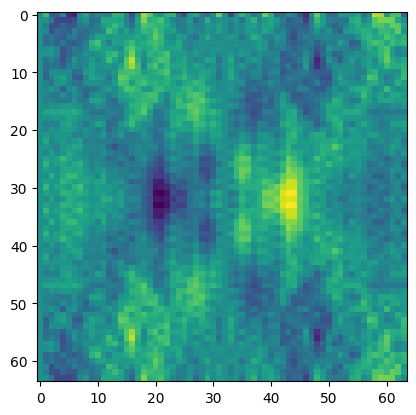

191
time 0.960100


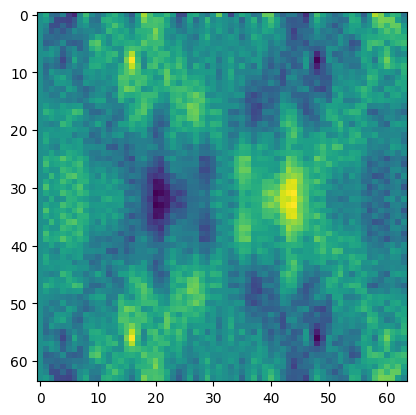

192
time 0.965100


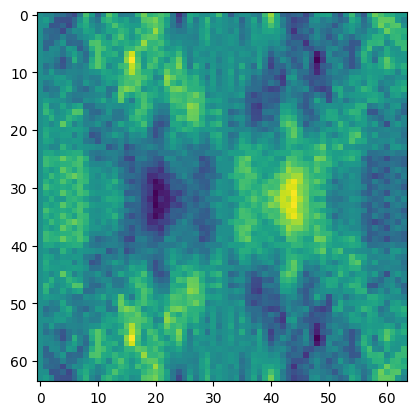

193
time 0.970100


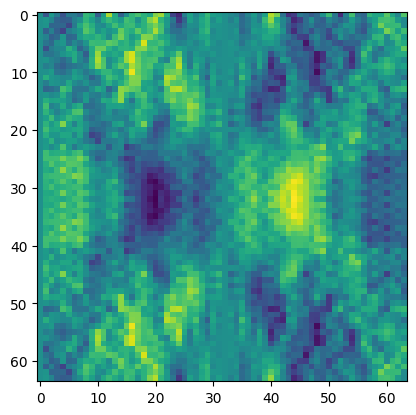

194
time 0.975100


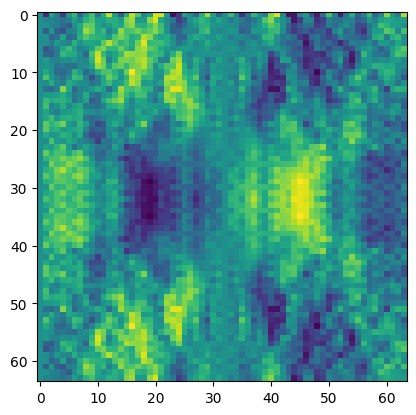

195
time 0.980100


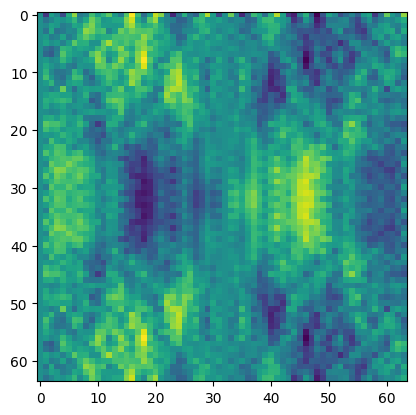

196
time 0.985100


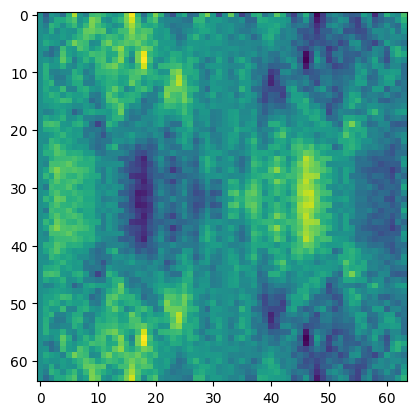

197
time 0.990100


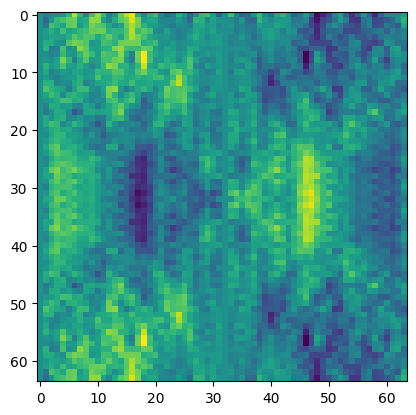

198
time 0.995100


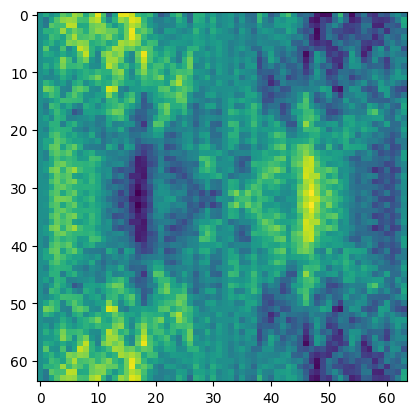

199


<Figure size 640x480 with 0 Axes>

In [ ]:
iteration_times= 10000



SW = shallow(N=64,px=32,py=32,R=64.,Hp=0.1,b=0.2)
# chose a point (x,y) to check the evolution
x=10
y=10

#true_u_vect = np.zeros((160,64,64))

#vor_u_vect = np.zeros((160,64,64))

index = 0

#SW.plot()
u_vect=np.zeros(iteration_times)
v_vect=np.zeros(iteration_times)
h_vect=np.zeros(iteration_times)
for i in range(iteration_times):
    SW.evolve()
    u_vect[i]=SW.u[x][y]
    v_vect[i]=SW.v[x][y]
    h_vect[i]=SW.h[x][y]
    #SW.animate()

    if i % 50 == 0:
        print ('time %f'%SW.time)
        plt.imshow(SW.u)
        plt.show()
        plt.close()
        print(index)
        #true_u_vect[index,:,:] = SW.u
        index += 1

gs = gridspec.GridSpec(2, 2,
                width_ratios=[1, 1],
                height_ratios=[1, 1]
                )

fig = plt.figure()

#fig = plt.figure()
t=SW.time




u_t = SW.u
v_t = SW.v

